# Faktor Apakah yang Menjual Sebuah Mobil?

Anda adalah seorang analis di Crankshaft List. Ratusan iklan kendaraan gratis ditayangkan di situs web Anda setiap hari. Anda perlu mempelajari kumpulan data selama beberapa tahun terakhir dan menentukan faktor-faktor yang memengaruhi harga sebuah kendaraan.

## Pra-pemrosesan

In [246]:
# Muat semua library
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from IPython.display import Image

### Memuat Data

In [247]:
# Muat file data menjadi DataFrame
vehicles = pd.read_csv('/datasets/vehicles_us.csv')


### Mengeksplorasi Data Awal

*Dataset* Anda berisi kolom-kolom berikut: 


- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, disel, dan lain-lain.
- `odometer` — jarak tempuh kendaraan saat iklan ditayangkan  
- `transmission`
- `paint_color`
- `is_4wd` — apakah kendaraan memiliki penggerak 4 roda (tipe Boolean)
- `date_posted` — tanggal iklan ditayangkan 
- `days_listed` — jumlah hari iklan ditayangkan hingga dihapus 
[Pahami kolom-kolomnya, lakukan eksplorasi data agar Anda terbiasa dengan data tersebut.]

In [248]:
# tampilkan informasi/rangkuman umum tentang DataFrame
vehicles.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


* DataFrame 51525 baris dan 13 kolom
* Terdapat nilai hilang dibeberapa kolom
* Sepertinya ada ketidaksesuain tipe data

In [249]:
# tampilkan sampel data 10 awal
vehicles.head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [250]:
# tampilkan sampel data 10 akhir
vehicles.tail(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
51515,12000,2005.0,chevrolet silverado 2500hd,good,8.0,diesel,228000.0,automatic,pickup,silver,1.0,2018-08-18,52
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,SUV,white,1.0,2018-11-01,51
51517,11000,2012.0,dodge charger,excellent,8.0,gas,81000.0,automatic,sedan,black,NaN,2019-04-19,44
51518,3750,2005.0,ford taurus,excellent,6.0,gas,110200.0,automatic,sedan,silver,NaN,2018-08-10,63
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,NaN,2018-11-24,89
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,NaN,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,NaN,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,NaN,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,NaN,2018-07-02,71
51524,6300,2014.0,nissan altima,good,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-06-05,10


* Terlihat dengan jelas bahwa nilai-nilai yang hilang ini tidak sejajar, karena bahkan pada sampel yang saya lihat, bahwa setiap nilai yang hilang pada setiap kolom kemungkinan disebabkan oleh kesalahan acak.
* Jika kita perhatikan tidak ada satu pun contoh boolean "0" (yang menunjukkan mobil bukan penggerak 4 roda) di kolom is_4wd. Hal ini kemungkinan berarti bahwa semua nilai yang hilang dimaksudkan untuk menjadi boolean yang menghasilkan False dan seharusnya hanya diganti dengan 0.
* Terdapat 7 jenis data object, 4 float64, dan 2 int64. Jenis data perlu diubah menjadi int untuk model_year (float64), dan cylinders (float64), odometer (float64). is_4wd perlu diselidiki lebih lanjut. date_posted perlu diubah menjadi tipe data datetime.

In [251]:
# ukuran data
vehicles.shape


(51525, 13)

In [252]:
# statistik deskriptif all
vehicles.describe(include='all')


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
count,51525.000000,47906.000000,51525,51525,46265.000000,51525,43633.000000,51525,51525,42258,25572.0,51525,51525.00000
unique,NaN,NaN,100,6,NaN,5,NaN,3,13,12,NaN,354,NaN
top,NaN,NaN,ford f-150,excellent,NaN,gas,NaN,automatic,SUV,white,NaN,2019-03-17,NaN
freq,NaN,NaN,2796,24773,NaN,47288,NaN,46902,12405,10029,NaN,186,NaN
mean,12132.464920,2009.750470,NaN,NaN,6.125235,NaN,115553.461738,NaN,NaN,NaN,1.0,NaN,39.55476
std,10040.803015,6.282065,NaN,NaN,1.660360,NaN,65094.611341,NaN,NaN,NaN,0.0,NaN,28.20427
min,1.000000,1908.000000,NaN,NaN,3.000000,NaN,0.000000,NaN,NaN,NaN,1.0,NaN,0.00000
25%,5000.000000,2006.000000,NaN,NaN,4.000000,NaN,70000.000000,NaN,NaN,NaN,1.0,NaN,19.00000
50%,9000.000000,2011.000000,NaN,NaN,6.000000,NaN,113000.000000,NaN,NaN,NaN,1.0,NaN,33.00000
75%,16839.000000,2014.000000,NaN,NaN,8.000000,NaN,155000.000000,NaN,NaN,NaN,1.0,NaN,53.00000


In [253]:
# statistik deskriptif
vehicles.describe()


,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


* Terdapat keanehan pada kolom harga, dimana harga minimum adalah 1, yang dimana jauh lebih rendah dari semua nilai harga lainnya dan lebih mungkin merupakan kesalahan daripada outlier. Saya tidak diberi tahu skala atau rentang harga, jadi jika itu adalah "harga dalam puluhan ribu dolar" maka mungkin tidak aneh, tetapi hal itu juga akan membuat harga maksimum sebesar 375.000 menjadi aneh (atau lebih aneh dari yang terlihat - mobil dengan harga $375.000 hampir luar biasa mahal).
* Kolom model_year juga menunjukkan bahwa tahun minimum adalah 1908. Kendaraan dari tahun 1908 sangat langka dan tidak akan dijual berdasarkan performa, warna, jarak tempuh, dll. Namun ada faktor tertentu seperti sejarah atau barang langkah, karena terdapat beberapa orang mengoleksi mobil yang umurnya sangat tua dikarenakan faktor sejarah dan model lama yang membedakan. Walaupun begitu, tampaknya hal ini tidak relevan dengan ruang lingkup analisis saya dan, sebagai hasilnya, ada kemungkinan saya akan menghapus mobil yang sudah cukup tua dari dataset.
* Kolom odometer memiliki nilai minimum 0, apakah itu adalah mobil baru?

In [254]:
# mengecek nilai hilang
vehicles.isnull().sum()


price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [255]:
# persentase nilai hilang
vehicles.isnull().sum()/len(vehicles) * 100


price            0.000000
model_year       7.023775
model            0.000000
condition        0.000000
cylinders       10.208637
fuel             0.000000
odometer        15.316836
transmission     0.000000
type             0.000000
paint_color     17.985444
is_4wd          50.369723
date_posted      0.000000
days_listed      0.000000
dtype: float64

In [256]:
# persentase nilai hilang yang diurutkan
round(vehicles.isna().sum().sort_values(ascending=False)/vehicles.shape[0] * 100, 2)


is_4wd          50.37
paint_color     17.99
odometer        15.32
cylinders       10.21
model_year       7.02
price            0.00
model            0.00
condition        0.00
fuel             0.00
transmission     0.00
type             0.00
date_posted      0.00
days_listed      0.00
dtype: float64

* Beberapa kolom (model_year, cylinders, odometer, paint_color, dan is_4wd) memiliki nilai yang hilang, dan jika kita teliti kolom is_4wd memiliki proporsi nilai hilang terbanyak yaitu 50.37%. 

In [257]:
# mengecek tipe data
vehicles.dtypes


price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

In [258]:
# mengecek duplikat
vehicles.duplicated().sum()


0

* Tidak terdapat nilai duplikat

In [259]:
# menghitung jumlah tiap nilai unik
for col in vehicles.columns:
    vehicles_count = vehicles[col].value_counts()
    print(f" {col} value counts: \n {vehicles_count} \n")
    

 price value counts: 
 1        798
6995     719
5995     655
4995     624
3500     620
        ... 
37873      1
6197       1
25647      1
3138       1
340        1
Name: price, Length: 3443, dtype: int64 

 model_year value counts: 
 2013.0    3549
2012.0    3468
2014.0    3448
2011.0    3375
2015.0    3323
          ... 
1948.0       1
1961.0       1
1936.0       1
1949.0       1
1955.0       1
Name: model_year, Length: 68, dtype: int64 

 model value counts: 
 ford f-150                           2796
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
ford f-250 super duty                 241
acura tl                              236
kia sorento                           236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: model, Length: 100, dtype: int64 

 condition value counts: 
 e

### Kesimpulan dan Langkah-Langkah Selanjutnya

**Kesimpulan:**
* Data kita terdiri dari 51525 baris dan 13 kolom, setiap baris menggambarkan iklan mobil yang mencakup berbagai atributnya, termasuk harga dan berapa lama iklan tersebut ditampilkan sejak diposting di situs web.
* Terdapat beberapa nilai yang hilang yang perlu diselidiki pada 5 kolom: `model_year`, `cylinders`, `odometer`, `paint_color`, dan `is_4wd`. Kolom `is_4wd` memiliki proporsi nilai hilang terbanyak yaitu 50.37% dan kolom `model_year` memiliki proporsi nilai hilang tersedikit yaitu 7.02%.
* Beberapa masalah dengan jenis data perlu diatasi: `model_year (float64)`, dan `cylinders (float64)`, `odometer (float64)`, `date_posted (object)`, dan `is_4wd (float64)` perlu diselidiki lebih lanjut (kemungkinan besar tipe data seharusnya boolean).
* Kolom `odometer` memiliki 185 nilai 0. Perlu diteliti lebih lanjut, apakah itu mobil baru yang belum pernah bergerak(?).
* Kolom `price` berkisar dari 1 hingga $375.000, nilai `odometer` berkisar antara 0 - 990K mil. `model_year` berkisar dari 1908 - 2019. Kolom-kolom ini memiliki rentang nilai beragam yang besar.
* Data kita tidak memiliki nilai duplikat.


**Langkah selanjutnya:**
* Mengatasi nilai hilang pada kolom `model_year`, `cylinders`, `odometer`, `paint_color`, dan `is_4wd`. 
* Memperbaiki tipe data pada kolom `model_year (float64)`, dan `cylinders (float64)`, `odometer (float64)` menjadi (int64), `date_posted (object)` menjadi (datetime64[ns]), dan `is_4wd` (float64) perlu diselidiki lebih lanjut.
* Mengatasi outlier di kolom `price`, `odometer` dan `model_year` perlu diselidiki lebih lanjut karena ada kemungkinan untuk menghapus mobil antik dari set data kita (berdasarkan IQR, kita bisa menilai outlier - mobil yang lebih tua dari tahun 2001 - sebagai 'antik' atau kita bisa menetapkan tanggal tertentu).



## Mengatasi Nilai-Nilai yang Hilang (Jika Ada)

In [260]:
# mengecek jumlah data yang hilang
vehicles.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [261]:
# fungsi menghitung persentase nilai yang hilang
def missing_values_table(vehicles):
        mis_val = vehicles.isnull().sum() # Total nilai yang hilang
        mis_val_percent = 100 * vehicles.isnull().sum() / len(vehicles) # persentase nilai yang hilang
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1) # tabel 
        
        # Mengganti nama kolom
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Mengurutkan dari persentase terbesar
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(2)
        
        return mis_val_table_ren_columns

missing_values_table(vehicles)    


,Missing Values,% of Total Values
is_4wd,25953,50.37
paint_color,9267,17.99
odometer,7892,15.32
cylinders,5260,10.21
model_year,3619,7.02


### **Mengatasi Nilai yang Hilang pada Kolom `is_4wd`**

Dikarenakan kolom `is_4wd` memiliki nilai yang hilang setengah dari total nilai yang hilang, maka nilai itu harus di isi. Dengan hipotesis kita pertama bahwa ada kemungkinan nilai yang hilang bisa kita gantikan dengan 0 (False /boolean), maka dari itu kita perlu mengecek nilai di kolom `is_4wd`.

In [262]:
vehicles['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

In [263]:
# mengisi nilai yang hilang dengan 0 = False
vehicles['is_4wd'] = vehicles['is_4wd'].fillna(0)

In [264]:
# mengecek nilai di kolom `is_4wd`
vehicles['is_4wd'].value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

In [265]:
# mengecek nilai yang hilang
vehicles['is_4wd'].isna().sum()

0

### **Mengatasi Nilai yang Hilang pada Kolom `paint_color`**

Kolom `paint_color` adalah kolom kedua terbanyak nilai yang hilang. Sebelum kita mengisi datanya, kita perlu melihat apakah nilai yang hilang hanya berdasarkan model tertentu? Apakah ada korelasinya? Apakah ada polanya?

In [266]:
paint_color_miss = pd.pivot_table(vehicles, 
                             values='paint_color', 
                             index='model', 
                             aggfunc=lambda x: sum(x.isnull()))

paint_color_miss

,paint_color
model,
acura tl,48
bmw x5,58
buick enclave,42
cadillac escalade,64
chevrolet camaro,72
...,...
toyota sienna,65
toyota tacoma,146
toyota tundra,111


Berdasarkan hasil pengamatan saya, kita bisa menyimpulkan bahwa nilai-nilai tersebut hilang di semua jenis mobil, saya tidak menemukan pola. Kita juga tidak bisa mengisinya dengan nilai mean ataupun median karena bersifat kategorial. Saya menyarankan untuk mengganti nilai yang hilang dengan 'other'.

In [267]:
# mengisi nilai yang hilang dengan 'other'
vehicles['paint_color'] = vehicles['paint_color'].fillna(value = 'other')

In [268]:
# mengecek nilai yang hilang
vehicles['paint_color'].isna().sum()

0

In [269]:
# mengecek update jenis 'other' pada kolom 'paint_color'
vehicles['paint_color'].value_counts()

white     10029
other      9267
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

### **Mengatasi Nilai yang Hilang pada Kolom `model_year`**

Untuk mengatasi nilai yang hilang di kolom `model_year`, terlebih dahulu kita menentukan apakah akan di isi dengan mean atau median.

In [270]:
# membuat dataset tanpa nilai yang hilang
model_year_clean = vehicles.loc[~vehicles['model_year'].isna()]
model_year_clean.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,other,1.0,2018-06-23,19
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,other,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15


In [271]:
# matriks korelasi
model_year_clean.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed
price,1.000000,0.428656,0.295579,-0.419144,0.316981,-0.002436
model_year,0.428656,1.000000,-0.148040,-0.473948,0.043384,-0.005703
cylinders,0.295579,-0.148040,1.000000,0.089742,0.404200,0.002502
odometer,-0.419144,-0.473948,0.089742,1.000000,0.034674,0.004162
is_4wd,0.316981,0.043384,0.404200,0.034674,1.000000,0.001971
days_listed,-0.002436,-0.005703,0.002502,0.004162,0.001971,1.000000


In [272]:
# mengecek nilai median dan mean pada model_year_clean dataset
model_year_clean_pvt = model_year_clean.pivot_table(index='model', 
                                                    values='model_year', 
                                                    aggfunc=['median', 'mean'])
model_year_clean_pvt

,median,mean
,model_year,model_year
model,,
acura tl,2007.0,2007.517857
bmw x5,2010.0,2008.991870
buick enclave,2012.0,2012.194553
cadillac escalade,2009.0,2008.508475
chevrolet camaro,2013.0,2008.397959
...,...,...
toyota sienna,2008.0,2008.584416
toyota tacoma,2010.0,2009.331599


<AxesSubplot:>

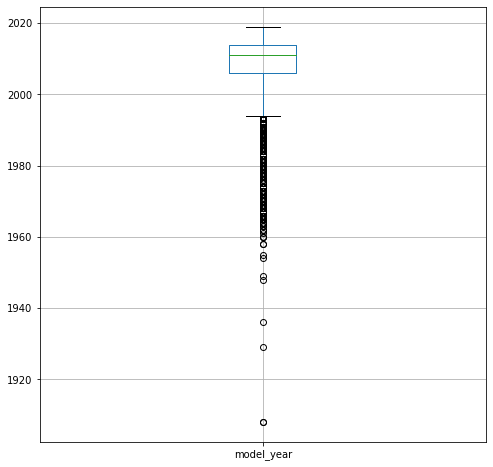

In [273]:
# mengecek outlier pada model_year_clean dataset
model_year_clean.boxplot(column='model_year')

Pada pengamatan kita terlihat bahwa terdapat banyak outlier pada kolom `model_year` sehingga pengisian nilai yang hilang lebih baik menggunakan median.

In [274]:
# fungsi untuk mengisi nilai yang hilang
def fill_missing_value (vehicles, model, model_year):
    grouped_values = vehicles.groupby('model')['model_year'].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values['model'][i]
        value = grouped_values['model_year'][i]
        vehicles.loc[(vehicles['model']==group) & (vehicles['model_year'].isna()), 'model_year'] = value
    return vehicles

# mengisi nilai yang hilang
vehicles = fill_missing_value(vehicles, 'model', 'model_year')

In [275]:
# mengecek nilai yang hilang
vehicles['model_year'].isna().sum()

0

### **Mengatasi Nilai yang Hilang pada Kolom `odometer`**

Sebelum kita mengatasi nilai yang hilang di kolom `odometer`, kita perlu mempertimbangkan apakah ada korelasi dengan kolom yang lain. Saya mendungan terdapat korelasi antara kolom `odometer` dengan `model_year`. 

In [276]:
# membuat dataset tanpa nilai yang hilang
odometer_clean = vehicles.loc[~vehicles['odometer'].isna()]
odometer_clean.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,other,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15


In [277]:
# matriks korelasi
odometer_clean.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed
price,1.000000,0.415151,0.297298,-0.420299,0.318415,0.000424
model_year,0.415151,1.000000,-0.149307,-0.460923,0.041339,-0.006058
cylinders,0.297298,-0.149307,1.000000,0.090160,0.403577,0.008527
odometer,-0.420299,-0.460923,0.090160,1.000000,0.036267,0.003804
is_4wd,0.318415,0.041339,0.403577,0.036267,1.000000,0.003221
days_listed,0.000424,-0.006058,0.008527,0.003804,0.003221,1.000000


<AxesSubplot:title={'center':'Scatterplot of no_missing_mile grouped by model_year and odometer'}, xlabel='model_year', ylabel='odometer'>

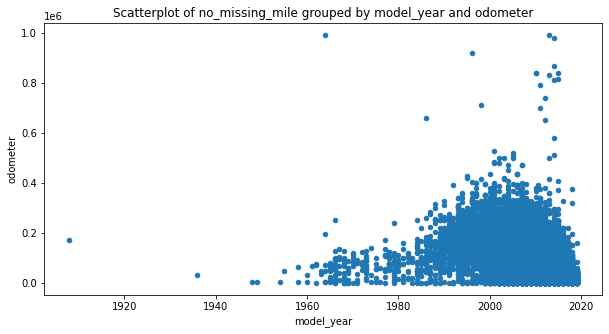

In [278]:
# mengecek korelasi antara model_year dan mileage (jarak tempuh pada odometer)

odometer_clean.plot(x='model_year', y='odometer', kind='scatter',
                     title = 'Scatterplot of no_missing_mile grouped by model_year and odometer', 
                     figsize = (10,5)) 

Matriks korelasi menunjukkan bahwa tidak ada korelasi yang sangat kuat antara nilai lainnya dengan odometer, kecuali kolom `model_year`. Memang secara logika, semakin lama mobilnya maka semakin besar nilai speedometernya (odometer). Namun, dalam suatu kejadian yang tidak terduga, sebenarnya ada indikasi kuat tentang korelasi negatif antara `model_year` dan jarak tempuh pada odometernya. Orang biasanya akan menduga bahwa mobil yang lebih tua akan dikendarai jauh lebih banyak daripada yang baru, karena lama penggunaannya untuk mengemudi. Namun, ini tidak berarti bahwa datanya cacat - ada banyak penjelasan logis untuk ini.
* Bisa saja pengemudi jarang memakainya atau hanya mengendarai di dalam kota
* Bisa juga ini adalah pemilik estafet dari pemilik sebelumnya (terdapat orang-orang yang cepat mengganti mobil dan menjualnya kembali/mobil bekas).
* Mungkin saja dipengaruhi juga oleh kendaraan online (mis. gojek, grab, maxim yang ada di Indonesia)

Kita mungkin harus memeriksa untuk melihat seberapa umum outlier dalam data untuk menentukan apakah kita akan mengisinya dengan mean atau median.

In [279]:
#check the values of median and mean in clean dataset
odometer_clean_pvt = odometer_clean.pivot_table(index='model_year', 
                                                values='odometer', 
                                                aggfunc=['median', 'mean'])
odometer_clean_pvt

,median,mean
,odometer,odometer
model_year,,
1908.0,169328.0,169328.000000
1936.0,30000.0,30000.000000
1948.0,4000.0,4000.000000
1949.0,1800.0,1800.000000
1954.0,3565.0,3565.000000
...,...,...
2015.0,78285.5,82503.819348
2016.0,53998.5,61244.992120


<AxesSubplot:title={'center':'odometer'}, xlabel='model_year'>

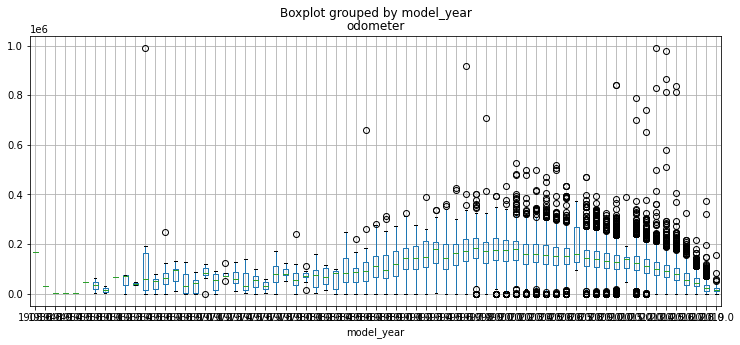

In [280]:
# menggunakan boxplot untuk mengecek outliers
odometer_clean.boxplot('odometer', 'model_year', figsize = (12, 5))

Grafik memberikan gambaran yang jelas. Kita melihat banyak outlier terlepas dari `model_year`. Ini berarti mengisi nilai yang hilang dengan median, berdasarkan`model_year`, akan menjadi pilihan yang jauh lebih baik.

In [281]:
# fungsi mengisi nilai yang hilang
def fill_missing_value (vehicles, model_year, odometer):
    grouped_values = vehicles.groupby('model_year')['odometer'].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values['model_year'][i]
        value = grouped_values['odometer'][i]
        vehicles.loc[(vehicles['model_year']==group) & (vehicles['odometer'].isna()), 'odometer'] = value
    return vehicles

# mengisi nilai yang hilang
vehicles = fill_missing_value(vehicles, 'model_year', 'odometer')

In [282]:
# mengecek nilai yang hilang
vehicles['odometer'].isna().sum()

1

Masih terdapat 1 data yang missing pada kolom `odometer`

In [283]:
# mengecek 1 data tersebut
vehicles.loc[vehicles['odometer'].isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
45694,18000,1929.0,ford f-150,good,8.0,gas,NaN,manual,other,silver,0.0,2018-11-18,59


Sepertinya kita perlu mengisinya secara manual, dikarenakan data di atas menunjukkan bahwa kolom `model_year` dengan value 1929 hanya 1 sehingga tidak bisa ditentukan nilai median untuk `odometer` berdasarkan kolom `model_year` pada mobil dengan keluaran tahun 1929.

In [284]:
# membuat dataset tanpa nilai yang hilang
odometer_clean_new = vehicles.loc[~vehicles['odometer'].isna()]
odometer_clean_new

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,other,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,161397.0,automatic,pickup,other,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71


In [285]:
# median dari seluruh data
med_odometer_all = odometer_clean_new['odometer'].median()
med_odometer_all

114074.0

In [286]:
# mengisi nilai yang hilang dengan median di mana model_year = 1929
vehicles.loc[vehicles.model_year == 1929, 'odometer'] = med_odometer_all

In [287]:
# mengecek nilai yang hilang
vehicles['odometer'].isna().sum()

0

### **Mengatasi Nilai yang Hilang pada Kolom `cylinders`**

Ada beberapa hal menarik untuk bagian ini, saya memiliki banyak pertimbangan, apakah jumlah `cylinders` ditentukan oleh `model`, `model_year` atau `type`? Untuk menentukan ini saya akan melihat matriks korelasi dan mencoba melakukan research sederhana melalui internet.

In [288]:
# membuat dataset tanpa nilai yang hilang
cylinders_clean = vehicles.loc[~vehicles['cylinders'].isna()]
cylinders_clean

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,other,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,161397.0,automatic,pickup,other,0.0,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,0.0,2018-10-03,37
51521,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,0.0,2018-11-14,22
51522,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,0.0,2018-11-15,32
51523,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,0.0,2018-07-02,71


In [289]:
# matriks korelasi
cylinders_clean.corr()

,price,model_year,cylinders,odometer,is_4wd,days_listed
price,1.000000,0.417709,0.296627,-0.431219,0.316437,0.000439
model_year,0.417709,1.000000,-0.149534,-0.488806,0.040871,-0.005982
cylinders,0.296627,-0.149534,1.000000,0.091189,0.405770,0.005517
odometer,-0.431219,-0.488806,0.091189,1.000000,0.030188,0.004121
is_4wd,0.316437,0.040871,0.405770,0.030188,1.000000,0.004891
days_listed,0.000439,-0.005982,0.005517,0.004121,0.004891,1.000000


Dari matriks korelasi meskipun bagian `is_4wd` memiliki korelasi mendekati 1, tapi tentu saja kita tau ini dikarenakan hanya ada dua pilihan entah True = 1 or False = 0. Kemudian urutan kedua ada di `price`, meskipun ada hubungan semakin tinggi silinder yang digunakan harga akan semakin mahal, namun bukan itu fokus kita. Terakhir seperti yang kita harapkan, yaitu kolom `model_year`, dan berdasarkan research saya di https://ackodrive.com/car-guide/automotive-engine-types/ hal yang mempengaruhi jumlah silinder juga adalah `model`.

Saya memperkirakan terdapat nama unik yang sebenarnya mirip di kolom `model`, untuk itu saya akan mengecek kolom ini terlebih dahulu.

In [290]:
vehicles['model'].unique()

array(['bmw x5', 'ford f-150', 'hyundai sonata', 'chrysler 200',
       'chrysler 300', 'toyota camry', 'honda pilot', 'kia sorento',
       'chevrolet silverado 1500', 'honda accord', 'ram 1500',
       'gmc yukon', 'jeep cherokee', 'chevrolet traverse',
       'hyundai elantra', 'chevrolet tahoe', 'toyota rav4',
       'chevrolet silverado', 'jeep wrangler', 'chevrolet malibu',
       'ford fusion se', 'chevrolet impala', 'chevrolet corvette',
       'jeep liberty', 'toyota camry le', 'nissan altima',
       'subaru outback', 'toyota highlander', 'dodge charger',
       'toyota tacoma', 'chevrolet equinox', 'nissan rogue',
       'mercedes-benz benze sprinter 2500', 'honda cr-v',
       'jeep grand cherokee', 'toyota 4runner', 'ford focus',
       'honda civic', 'kia soul', 'chevrolet colorado',
       'ford f150 supercrew cab xlt', 'chevrolet camaro lt coupe 2d',
       'chevrolet cruze', 'ford mustang', 'chevrolet silverado 3500hd',
       'nissan frontier crew cab sv', 'subaru imp

In [291]:
# mengganti nama yang mirip
vehicles['model'] = vehicles['model'].replace('ford f150', 'ford f-150')
vehicles['model'] = vehicles['model'].replace('ford f250', 'ford f-250')
vehicles['model'] = vehicles['model'].replace('ford f250 super duty', 'ford f-250 sd')
vehicles['model'] = vehicles['model'].replace('ford f-250 super duty', 'ford f-250 sd')
vehicles['model'] = vehicles['model'].replace('ford f350 super duty', 'ford f-350 sd')
vehicles['model'] = vehicles['model'].replace('jeep cherokee', 'jeep grand cherokee')

In [292]:
vehicles['model'].value_counts()

ford f-150                           3326
chevrolet silverado 1500             2171
ram 1500                             1750
chevrolet silverado                  1271
jeep wrangler                        1119
                                     ... 
dodge dakota                          242
kia sorento                           236
acura tl                              236
nissan murano                         235
mercedes-benz benze sprinter 2500      41
Name: model, Length: 94, dtype: int64

In [293]:
# mengecek kolom cylinders
vehicles['cylinders'].value_counts().sort_index()

3.0        34
4.0     13864
5.0       272
6.0     15700
8.0     15844
10.0      549
12.0        2
Name: cylinders, dtype: int64

In [294]:
# fungsi untuk mengisi nilai NaN dengan nilai median dari kolom yang dimaksud (btw untuk kolom hilang yang lain bisa juga)
def fill_nan(selection):    
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        if len(selection) == 0:
            return np.nan        
        else :
            return selection.median()

In [295]:
# mengisi nilai yang hilang
# cara1
vehicles['cylinders'] = vehicles['cylinders'].fillna(
    vehicles
    .groupby(['model','model_year'])['cylinders']
    .transform(fill_nan))

# cara2
# vehicles['cylinders'] = vehicles['cylinders'].fillna(
#     vehicles.groupby(['model', 'model_year'])['cylinders'].transform('median'))

In [296]:
vehicles['cylinders'].isnull().sum()

22

Kita masih memiliki 22 nilai yang hilang. Hal ini karena beberapa kombinasi `model` dan `model_year` tidak dikaitkan dengan nilai dalam `cylinders`, oleh karena itu tidak ada nilai silinder untuk dimasukkan.

Kita akan mengganti baris yang tersisa hanya menggunakan `model` sebagai groupby.

In [297]:
vehicles['cylinders'] = vehicles['cylinders'].fillna(
    vehicles.groupby(['model'])['cylinders'].transform('median'))

In [298]:
vehicles['cylinders'].isnull().sum()

0

In [299]:
# mengecek kolom cylinders
vehicles['cylinders'].value_counts().sort_index()

3.0        34
4.0     15466
4.5         1
5.0       313
5.5         1
6.0     17490
7.0         9
8.0     17642
9.0         2
10.0      565
12.0        2
Name: cylinders, dtype: int64

Sepertinya ada yang salah, awalnya 7 nilai unik menjadi 11 nilai unik. Kita akan memperbaikinya secara manual.

In [300]:
vehicles.loc[vehicles['cylinders'] == 4.5, 'cylinders'] = 5.0
vehicles.loc[vehicles['cylinders'] == 5.5, 'cylinders'] = 6.0
vehicles.loc[vehicles['cylinders'] == 7.0, 'cylinders'] = 8.0
vehicles.loc[vehicles['cylinders'] == 9.0, 'cylinders'] = 10.0

In [301]:
# mengecek kolom cylinders yang sudah diperbaiki secara manual
vehicles['cylinders'].value_counts().sort_index()

3.0        34
4.0     15466
5.0       314
6.0     17491
8.0     17651
10.0      567
12.0        2
Name: cylinders, dtype: int64

In [302]:
# mengecek dataset yang sudah di isi
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     51525 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [303]:
# mengecek nilai hilang
vehicles.isnull().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

In [304]:
# mengecek dataset sample acak
vehicles.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
51402,22000,2003.0,chevrolet silverado 2500hd,excellent,8.0,gas,53000.0,automatic,pickup,other,1.0,2018-10-13,27
7259,21900,2015.0,ford explorer,good,6.0,gas,34009.0,automatic,SUV,red,0.0,2018-09-29,68
262,19675,2008.0,gmc sierra 2500hd,good,8.0,gas,140000.0,automatic,truck,grey,1.0,2018-09-22,35
30385,18995,2011.0,chevrolet suburban,excellent,8.0,gas,109156.0,automatic,SUV,custom,1.0,2018-05-02,25
46020,10995,2012.0,ford mustang,excellent,6.0,gas,70305.0,automatic,coupe,black,0.0,2019-01-20,10
5635,27900,2014.0,chevrolet silverado 1500,excellent,8.0,gas,60304.0,automatic,truck,white,1.0,2019-03-24,61
28972,1000,1993.0,ford explorer,fair,6.0,gas,200000.0,automatic,SUV,green,0.0,2018-09-14,50
5139,3500,2004.0,chevrolet tahoe,excellent,8.0,gas,256000.0,automatic,SUV,red,1.0,2019-03-28,16
42992,11850,2017.0,ford fusion se,excellent,4.0,gas,69200.0,automatic,sedan,white,0.0,2018-05-30,81
31782,9900,2014.0,ford fusion,excellent,4.0,gas,80284.0,automatic,sedan,white,0.0,2018-10-23,17


## Memperbaiki Tipe Data

In [305]:
# cek tipe data
vehicles.dtypes

price             int64
model_year      float64
model            object
condition        object
cylinders       float64
fuel             object
odometer        float64
transmission     object
type             object
paint_color      object
is_4wd          float64
date_posted      object
days_listed       int64
dtype: object

In [306]:
# ubah tipe data
try: 
    vehicles['model_year'] = vehicles['model_year'].astype('int')
    vehicles['cylinders']  = vehicles['cylinders'].astype('int')
    vehicles['odometer']   = vehicles['odometer'].astype('int')
    vehicles['is_4wd']     = vehicles['is_4wd'].astype('int')
    vehicles['date_posted'] = pd.to_datetime(vehicles['date_posted'], format='%Y-%m-%d')
except: 
    print('Data conversion failed ((')
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  int64         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(6)
memory usage: 5.1+ MB


## Memperbaiki Kualitas Data

Untuk mempermudah analisis, ada beberapa hal yang dapat kita lakukan terhadap dataset kita, hal ini juga untuk membuat data kita lebih jelas untuk digunakan:
* Menambah kolom untuk `year_posted`, `month_posted`, dan `day_posted` iklan ditayangkan
* Menambah kolom `vehicle_age` kendaraan ketika iklan ditayangkan
* Menambah kolom `km_per_year` untuk jarak tempuh kendaraan per-tahun
* Mengubah nilai pada kolom `condition` dengan nilai numeric (skala 0-5) 

### **Menambah Kolom Turunan `date_posted`**

In [307]:
# menambah kolom untuk year_posted, month_posted, dan day_posted iklan ditayangkan
vehicles['day_posted']   = pd.to_datetime(vehicles['date_posted'], format = '%Y-%m-%d').dt.weekday
vehicles['month_posted'] = pd.to_datetime(vehicles['date_posted'], format = '%Y-%m-%d').dt.month
vehicles['year_posted']  = pd.to_datetime(vehicles['date_posted'], format = '%Y-%m-%d').dt.year

vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,other,1,2018-06-23,19,5,6,2018
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,4,10,2018
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,2,2019
3,1500,2003,ford f-150,fair,8,gas,161397,automatic,pickup,other,0,2019-03-22,9,4,3,2019
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,4,2019


### **Menambah Kolom `vehicle_age`**

In [308]:
# menambah kolom vehicle_age kendaraan ketika iklan ditayangkan
vehicles['vehicle_age'] = vehicles['year_posted'] - vehicles['model_year']

vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,vehicle_age
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,other,1,2018-06-23,19,5,6,2018,7
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,4,10,2018,7
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6
3,1500,2003,ford f-150,fair,8,gas,161397,automatic,pickup,other,0,2019-03-22,9,4,3,2019,16
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2


Antisipasi kemungkinan terdapat beberapa data pada kolom `vehicle_age` menjadi 0 karena `model_year` kendaraan sama dengan `year_posted`, maka kita bisa bulatkan nilainya dan dianggap sudah 1 tahun usia kendaraannya.

In [309]:
# mengganti nilai vehicle_age jika nilainya = 0
vehicles['vehicle_age'] = vehicles['vehicle_age'].replace([0], 1)

vehicles.loc[vehicles['vehicle_age'] == 0]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,vehicle_age


### **Menambah Kolom `km_per_year`**

In [310]:
# menambah kolom km_per_year untuk jarak tempuh kendaraan per-tahun
vehicles['km_per_year'] = round(vehicles['odometer'] / vehicles['vehicle_age'])

vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,vehicle_age,km_per_year
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,other,1,2018-06-23,19,5,6,2018,7,20714.0
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,4,10,2018,7,12672.0
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333.0
3,1500,2003,ford f-150,fair,8,gas,161397,automatic,pickup,other,0,2019-03-22,9,4,3,2019,16,10087.0
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2,40452.0


### **Mengubah Nilai Kolom `condition`**

In [311]:
# mengubah nilai pada kolom condition dengan nilai numeric (skala 0-5)
condition_dict = {
 'new'       : 5,
 'like new'  : 4,
 'excellent' : 3,
 'good'      : 2,
 'fair'      : 1,
 'salvage'   : 0
}

vehicles['condition'] = vehicles['condition'].replace(condition_dict)
vehicles.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,vehicle_age,km_per_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,other,1,2018-06-23,19,5,6,2018,7,20714.0
1,25500,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,4,10,2018,7,12672.0
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333.0
3,1500,2003,ford f-150,1,8,gas,161397,automatic,pickup,other,0,2019-03-22,9,4,3,2019,16,10087.0
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2,40452.0


## Memeriksa Data yang Sudah Bersih

[Mengingat data sudah siap untuk dianalisis, mari kita lihat data Anda sekilas lagi. Sangat berguna untuk melihat apa yang sebenarnya akan Anda gunakan untuk analisis.]

In [312]:
# cek data info
vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  int64         
 4   cylinders     51525 non-null  int64         
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  int64         
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  int64         
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  day_posted    51525 non-null  int64         
 14  month_posted  51525 non-null  int64         
 15  year_posted   51525 non-null  int64 

In [313]:
# tampilkan informasi/rangkuman umum tentang DataFrame
round(vehicles.describe(),2)

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,day_posted,month_posted,year_posted,vehicle_age,km_per_year
count,51525.00,51525.00,51525.00,51525.00,51525.00,51525.0,51525.00,51525.00,51525.00,51525.00,51525.00,51525.00
mean,12132.46,2009.79,2.64,6.12,115199.67,0.5,39.55,3.01,6.63,2018.31,8.56,17725.11
std,10040.80,6.10,0.71,1.66,62082.61,0.5,28.20,2.00,3.47,0.46,6.06,12442.78
min,1.00,1908.00,0.00,3.00,0.00,0.0,0.00,0.00,1.00,2018.00,1.00,0.00
25%,5000.00,2007.00,2.00,4.00,73500.00,0.0,19.00,1.00,3.00,2018.00,4.00,10909.00
50%,9000.00,2011.00,3.00,6.00,114074.00,0.0,33.00,3.00,7.00,2018.00,8.00,15234.00
75%,16839.00,2014.00,3.00,8.00,152862.00,1.0,53.00,5.00,10.00,2019.00,12.00,20982.00
max,375000.00,2019.00,5.00,12.00,990000.00,1.0,271.00,6.00,12.00,2019.00,110.00,373200.00


In [314]:
# tampilkan sampel data 
vehicles.sample(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,vehicle_age,km_per_year
33574,9000,2015,ford fusion,3,4,gas,95000,automatic,sedan,other,1,2019-03-16,25,5,3,2019,4,23750.0
25774,5495,2009,chevrolet traverse,2,6,gas,164286,automatic,wagon,silver,0,2019-02-23,58,5,2,2019,10,16429.0
5474,9685,2012,nissan frontier,2,6,gas,119503,automatic,truck,white,0,2018-10-19,33,4,10,2018,6,19917.0
12228,19500,2010,chevrolet silverado 2500hd,3,8,gas,118505,automatic,pickup,other,1,2018-10-26,10,4,10,2018,8,14813.0
29998,700,1999,toyota rav4,1,4,gas,258000,manual,SUV,black,1,2018-08-18,7,5,8,2018,19,13579.0
7152,45793,2018,ford f-150,2,6,gas,9492,automatic,truck,blue,1,2018-05-05,62,5,5,2018,1,9492.0
41536,24998,2016,ford edge,3,6,gas,27000,automatic,SUV,red,1,2018-05-02,31,2,5,2018,2,13500.0
4356,9400,2015,honda civic lx,4,4,gas,53000,automatic,sedan,white,0,2018-07-09,15,0,7,2018,3,17667.0
6432,2500,1999,ford f-150,2,8,gas,118000,automatic,truck,green,1,2019-03-14,106,3,3,2019,20,5900.0
18747,17990,2015,ford f-150,2,6,gas,78285,automatic,truck,red,1,2018-08-31,33,4,8,2018,3,26095.0


## Mempelajari Parameter Inti 
Memeriksa parameter yang mungkin akan mempengaruhi analisa.
Parameternya adalah: 
- Harga
- Usia kendaraan ketika iklan ditayangkan
- Jarak tempuh
- Jumlah silinder 
- Kondisi

* Kita akan membuat grafik berdasarkan data dari tabel, menemukan outlier, nilai anomali, dan menganalisis faktor apa saja yang memengaruhi harga dan waktu publikasi iklan.
Sebelum memeriksa parameter, kita dapat memeriksa matriks korelasi untuk mendapatkan ide dasar tentang apa yang diharapkan.

In [315]:
# matriks korelasi
vehicles.corr()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,day_posted,month_posted,year_posted,vehicle_age,km_per_year
price,1.000000,0.412969,0.221518,0.296936,-0.424782,0.315145,-0.000682,-0.000343,-0.005653,0.004726,-0.406648,0.198709
model_year,0.412969,1.000000,0.269698,-0.152467,-0.487857,0.039103,-0.005321,-0.006894,-0.009610,0.008333,-0.996748,0.473109
condition,0.221518,0.269698,1.000000,-0.066621,-0.292305,0.012856,-0.002404,0.001152,-0.002355,0.003788,-0.267180,0.069345
cylinders,0.296936,-0.152467,-0.066621,1.000000,0.093386,0.404231,0.003789,-0.003136,0.001220,0.000261,0.154003,-0.043920
odometer,-0.424782,-0.487857,-0.292305,0.093386,1.000000,0.031310,0.002700,0.000752,0.009355,-0.006371,0.480397,0.106408
is_4wd,0.315145,0.039103,0.012856,0.404231,0.031310,1.000000,0.002003,0.003207,0.003891,-0.002476,-0.037823,0.047831
days_listed,-0.000682,-0.005321,-0.002404,0.003789,0.002700,0.002003,1.000000,0.002734,-0.011519,0.011273,0.005989,-0.005643
day_posted,-0.000343,-0.006894,0.001152,-0.003136,0.000752,0.003207,0.002734,1.000000,0.006457,-0.007476,0.006653,-0.004736
month_posted,-0.005653,-0.009610,-0.002355,0.001220,0.009355,0.003891,-0.011519,0.006457,1.000000,-0.818207,-0.051104,0.107793
year_posted,0.004726,0.008333,0.003788,0.000261,-0.006371,-0.002476,0.011273,-0.007476,-0.818207,1.000000,0.065828,-0.128050


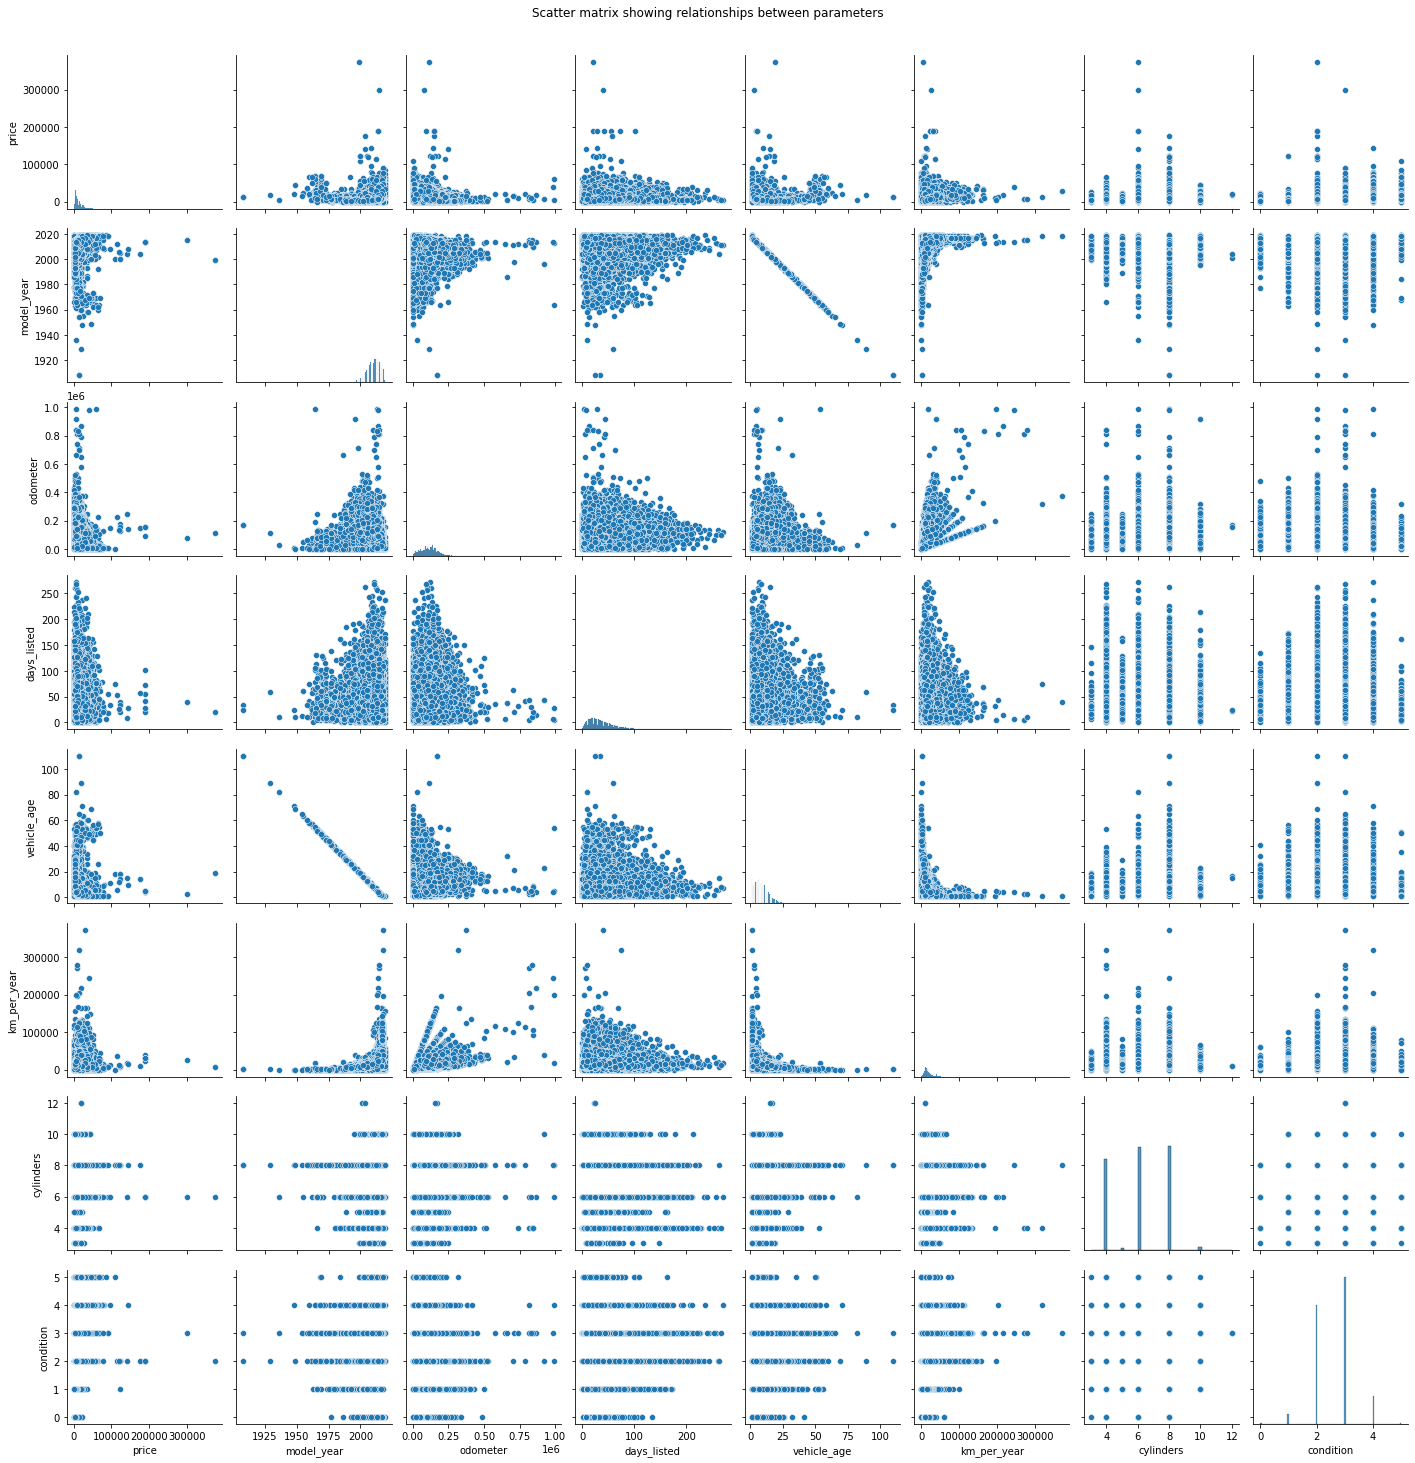

In [316]:
# matriks scatter
ax = sns.pairplot(
    vehicles[['price', 'model_year', 'odometer', 'days_listed', 'vehicle_age', 'km_per_year', 'cylinders', 'condition']]
)
ax.fig.suptitle('Scatter matrix showing relationships between parameters', y=1.02);

<AxesSubplot:title={'center':'price'}, ylabel='Frequency'>

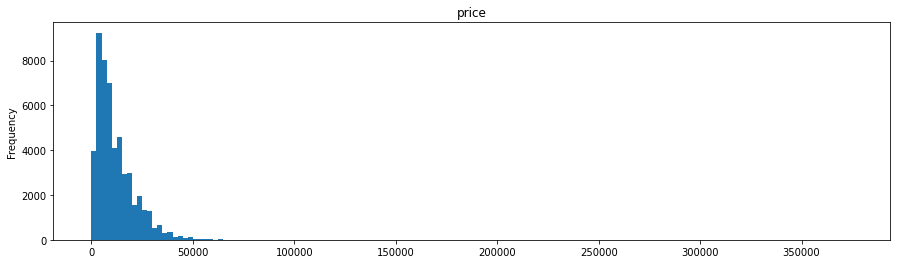

In [317]:
# histogram price
vehicles['price'].plot(
    kind     = 'hist'
    ,title   = 'price'
    ,bins    = 150
    ,figsize = (15, 4))

<AxesSubplot:title={'center':'vehicle_age'}, ylabel='Frequency'>

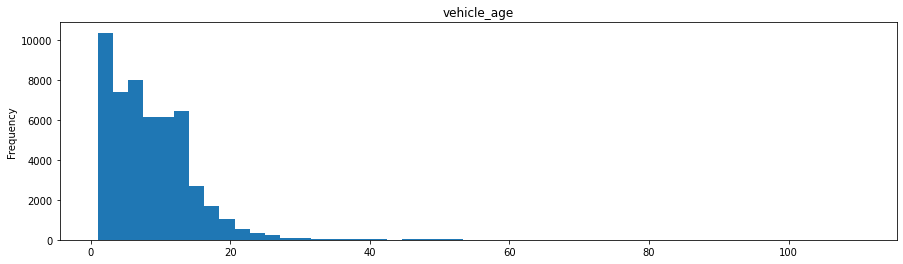

In [318]:
# histogram vehicle_age
vehicles['vehicle_age'].plot(
    kind     = 'hist'
    ,title   = 'vehicle_age'
    ,bins    = 50
    ,figsize = (15, 4))

<AxesSubplot:title={'center':'odometer'}, ylabel='Frequency'>

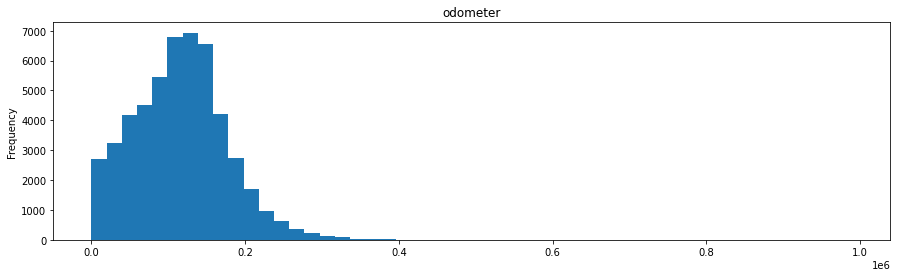

In [319]:
# histogram odometer
vehicles['odometer'].plot(
    kind     = 'hist'
    ,title   = 'odometer'
    ,bins    = 50
    ,figsize = (15, 4))

<AxesSubplot:title={'center':'cylinders'}, ylabel='Frequency'>

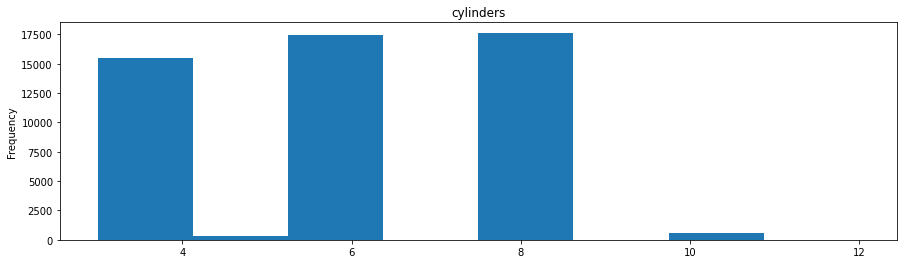

In [320]:
# histogram cylinders
vehicles['cylinders'].plot(
    kind     = 'hist'
    ,title   = 'cylinders'
    ,bins    = 8
    ,figsize = (15, 4))

Grafik menunjukkan tidak ada anomali yang kita temukan, jika dilihat persentase mobil yang memiliki 4, 6 atau 8 silinder sangat banyak.

<AxesSubplot:title={'center':'condition'}, ylabel='Frequency'>

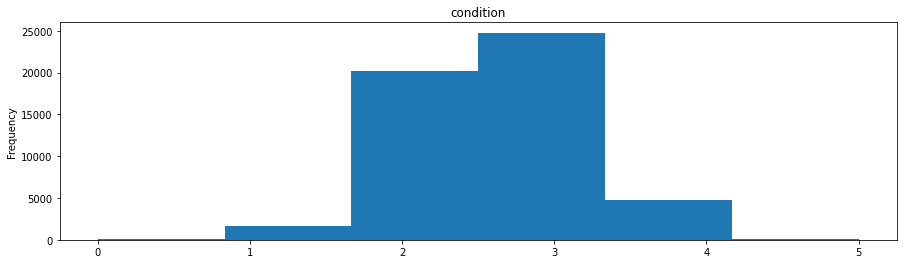

In [321]:
# histogram condition
vehicles['condition'].plot(
    kind     = 'hist'
    ,title   = 'condition'
    ,bins    = 6
    ,figsize = (15, 4))

In [322]:
# alternatif code
# columns = ['price','vehicle_age', 'odometer','cylinders','condition']
# for col in columns:
#     vehicles[col].plot(kind='hist', bins=50, grid=True)
#     plt.title(col)
#     plt.show()

* Histogram yang diplot untuk parameter `price`, `vehicle_age`, `odometer` tidak terlalu informatif. Grafiknya sangat bergeser ke kiri (skewed to the left). 
* Sedangkan untuk `cylinders` dan `condition`, histogram terlihat cukup informatif.

Sebelum kita memeriksa dan menghilangkan outlier, saya ingin mengingat dan mengetahui kembali korelasi sebelum dan setelah menghilangkan outlier untuk membuktikan bahwa ada peningkatan korelasi setelah menghilangkan outlier.

In [323]:
# korelasi sebelum outlier dihilangkan
corr_before = vehicles.corr()['price'].sort_values(ascending=False).drop('price')
corr_before

model_year      0.412969
is_4wd          0.315145
cylinders       0.296936
condition       0.221518
km_per_year     0.198709
year_posted     0.004726
day_posted     -0.000343
days_listed    -0.000682
month_posted   -0.005653
vehicle_age    -0.406648
odometer       -0.424782
Name: price, dtype: float64

## Mempelajari dan Menangani Outlier

### **Kolom `price`**

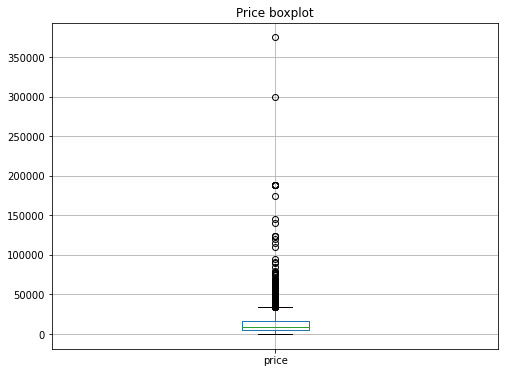

In [324]:
# outlier boxplot
plt.figure(figsize=(8,6))
vehicles.boxplot('price')
plt.title('Price boxplot')
plt.show()

Jika kita lihat dari histogram sebelumnya dengan boxplot terdapat nilai ekstrim di top bound yang harus dihilangkan. Karena nilai ekstrem tidak mewakili seluruh kumpulan data sehingga harus dihapus.

In [325]:
# mengecek nilai outlier
Q1_price  = vehicles['price'].quantile(0.25)
Q3_price  = vehicles['price'].quantile(0.75)
IQR_price = Q3_price - Q1_price

# mengecek lower bound dan upper bound
lowerbound_price = Q1_price - (1.5*IQR_price)
upperbound_price = Q3_price + (1.5*IQR_price)

print(f"Q1 : {Q1_price}")
print(f"Q3 : {Q3_price}")
print(f"IQR : {IQR_price}")
print()
print(f'Lowerbound : {lowerbound_price}')
print(f'Upperbound : {upperbound_price}')


Q1 : 5000.0
Q3 : 16839.0
IQR : 11839.0

Lowerbound : -12758.5
Upperbound : 34597.5


* Nilai `price` yang kurang dari -12758.5 adalah outlier. 
* Batas bawah akan diubah ke = 0. 
* Nilai `price` yang lebih dari 34.597.5 akan dianggap outlier juga.

In [326]:
price_outliers = vehicles.loc[(vehicles['price'] < (Q1_price - 1.5*IQR_price)) | (
    vehicles['price'] > (Q3_price + 1.5 * IQR_price))]

In [327]:
# mengecek jumlah outlier
len(price_outliers)

1646

In [328]:
round(len(price_outliers) / len(vehicles) * 100,2)

3.19

Ada 1646 outlier `price` yang merupakan 3.19% dari data.

In [329]:
# dataset baru dengan rentang price 0 - 34.597.5
price_clean = vehicles.query('0 < price < @upperbound_price')

### **Kolom `vehicle_age`**

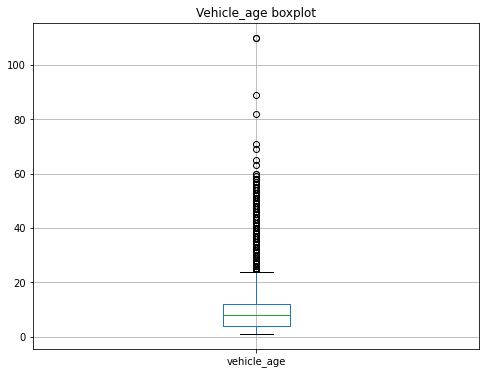

In [330]:
# outlier boxplot
plt.figure(figsize=(8,6))
vehicles.boxplot('vehicle_age')
plt.title('Vehicle_age boxplot')
plt.show()

In [331]:
# mengecek nilai outlier
Q1_vehicle_age  = vehicles['vehicle_age'].quantile(0.25)
Q3_vehicle_age  = vehicles['vehicle_age'].quantile(0.75)
IQR_vehicle_age = Q3_vehicle_age - Q1_vehicle_age

# mengecek lower bound dan upper bound
lowerbound_vehicle_age = Q1_vehicle_age - (1.5*IQR_vehicle_age)
upperbound_vehicle_age = Q3_vehicle_age + (1.5*IQR_vehicle_age)

print(f"Q1 : {Q1_vehicle_age}")
print(f"Q3 : {Q3_vehicle_age}")
print(f"IQR : {IQR_vehicle_age}")
print()
print(f'Lowerbound : {lowerbound_vehicle_age}')
print(f'Upperbound : {upperbound_vehicle_age}')

Q1 : 4.0
Q3 : 12.0
IQR : 8.0

Lowerbound : -8.0
Upperbound : 24.0


* Nilai `vehicle_age` yang kurang dari -8.0 adalah outlier. 
* Batas bawah akan diubah ke = 0. 
* Nilai `vehicle_age` yang lebih dari 24 akan dianggap outlier juga.

In [332]:
vehicle_age_outliers = vehicles.loc[(vehicles['vehicle_age'] < (Q1_vehicle_age - 1.5*IQR_vehicle_age)) | (
    vehicles['vehicle_age'] > (Q3_vehicle_age + 1.5 * IQR_vehicle_age))]

In [333]:
# mengecek jumlah outlier
len(vehicle_age_outliers)

737

In [334]:
round(len(vehicle_age_outliers) / len(vehicles) * 100,2)

1.43

Ada 737 outlier `vehicle_age` yang merupakan 1.43% dari data.

In [335]:
# dataset baru dengan rentang vehicle_age 0 - 24
vehicle_age_clean = price_clean.query('0 < vehicle_age < @upperbound_vehicle_age')

### **Kolom `odometer`**

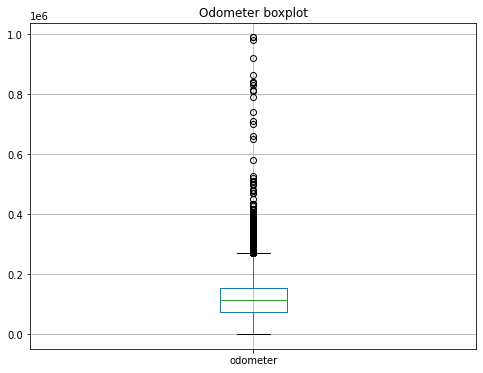

In [336]:
# outlier boxplot
plt.figure(figsize=(8,6))
vehicles.boxplot('odometer')
plt.title('Odometer boxplot')
plt.show()

In [337]:
# mengecek nilai outlier
Q1_odometer  = vehicles['odometer'].quantile(0.25)
Q3_odometer  = vehicles['odometer'].quantile(0.75)
IQR_odometer = Q3_odometer - Q1_odometer

# mengecek lower bound dan upper bound
lowerbound_odometer = Q1_odometer - (1.5*IQR_odometer)
upperbound_odometer = Q3_odometer + (1.5*IQR_odometer)

print(f"Q1 : {Q1_odometer}")
print(f"Q3 : {Q3_odometer}")
print(f"IQR : {IQR_odometer}")
print()
print(f'Lowerbound : {lowerbound_odometer}')
print(f'Upperbound : {upperbound_odometer}')

Q1 : 73500.0
Q3 : 152862.0
IQR : 79362.0

Lowerbound : -45543.0
Upperbound : 271905.0


* Nilai `odometer` yang kurang dari -45543 adalah outlier. 
* Batas bawah akan diubah ke = 0. 
* Nilai `odometer` yang lebih dari 271905 akan dianggap outlier juga.

In [338]:
odometer_outliers = vehicles.loc[(vehicles['odometer'] < (Q1_odometer - 1.5*IQR_odometer)) | (
    vehicles['odometer'] > (Q3_odometer + 1.5 * IQR_odometer))]

In [339]:
# mengecek jumlah outlier
len(odometer_outliers)

645

In [340]:
round(len(odometer_outliers) / len(vehicles) * 100,2)

1.25

Ada 645 outlier `odometer` yang merupakan 1.25% dari data.

In [341]:
# dataset baru dengan rentang vehicle_age 0 - 271905
odometer_clean = vehicle_age_clean.query('0 < odometer < @upperbound_odometer')

### **Kolom `cylinders`**

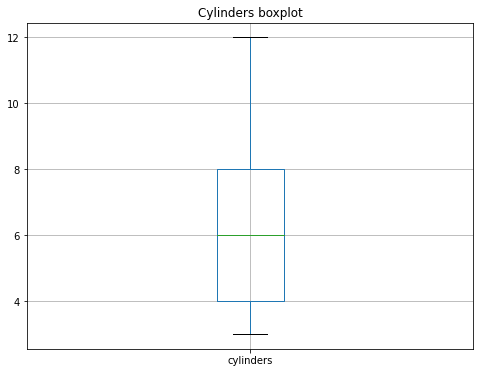

In [342]:
# outlier boxplot
plt.figure(figsize=(8,6))
vehicles.boxplot('cylinders')
plt.title('Cylinders boxplot')
plt.show()

Tampaknya kolom `cylinders` tidak memiliki outliers.

In [343]:
# mengecek nilai outlier
Q1_cylinders  = vehicles['cylinders'].quantile(0.25)
Q3_cylinders  = vehicles['cylinders'].quantile(0.75)
IQR_cylinders = Q3_cylinders - Q1_cylinders

# mengecek lower bound dan upper bound
lowerbound_cylinders = Q1_cylinders - (1.5*IQR_cylinders)
upperbound_cylinders = Q3_cylinders + (1.5*IQR_cylinders)

print(f"Q1 : {Q1_cylinders}")
print(f"Q3 : {Q3_cylinders}")
print(f"IQR : {IQR_cylinders}")
print()
print(f'Lowerbound : {lowerbound_cylinders}')
print(f'Upperbound : {upperbound_cylinders}')

Q1 : 4.0
Q3 : 8.0
IQR : 4.0

Lowerbound : -2.0
Upperbound : 14.0


* Nilai `cylinders` yang kurang dari -2 adalah outlier. 
* Batas bawah akan diubah ke = 0. 
* Nilai `cylinders` yang lebih dari 14 akan dianggap outlier juga.

In [344]:
cylinders_outliers = vehicles.loc[(vehicles['cylinders'] < (Q1_cylinders - 1.5*IQR_cylinders)) | (
    vehicles['cylinders'] > (Q3_cylinders + 1.5 * IQR_cylinders))]

In [345]:
# mengecek jumlah outlier
len(cylinders_outliers)

0

In [346]:
round(len(cylinders_outliers) / len(vehicles) * 100,2)

0.0

In [347]:
# dataset baru dengan rentang vehicle_age 0 - 14
cylinders_clean = odometer_clean.query('0 < cylinders < @upperbound_cylinders')

### **Kolom `condition`**

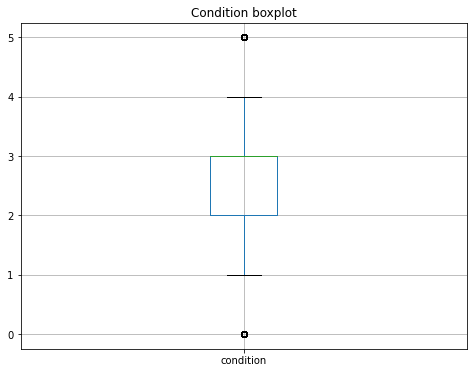

In [348]:
# outlier boxplot
plt.figure(figsize=(8,6))
vehicles.boxplot('condition')
plt.title('Condition boxplot')
plt.show()

In [349]:
# mengecek nilai outlier
Q1_condition  = vehicles['condition'].quantile(0.25)
Q3_condition  = vehicles['condition'].quantile(0.75)
IQR_condition = Q3_condition - Q1_condition

# mengecek lower bound dan upper bound
lowerbound_condition = Q1_condition - (1.5*IQR_condition)
upperbound_condition = Q3_condition + (1.5*IQR_condition)

print(f"Q1 : {Q1_condition}")
print(f"Q3 : {Q3_condition}")
print(f"IQR : {IQR_condition}")
print()
print(f'Lowerbound : {lowerbound_condition}')
print(f'Upperbound : {upperbound_condition}')

Q1 : 2.0
Q3 : 3.0
IQR : 1.0

Lowerbound : 0.5
Upperbound : 4.5


* Nilai `condition` yang kurang dari 0.5 adalah outlier. 
* Batas bawah akan diubah ke = 0. 
* Nilai `condition` yang lebih dari 4.5 akan dianggap outlier juga.

In [350]:
condition_outliers = vehicles.loc[(vehicles['condition'] < (Q1_condition- 1.5*IQR_condition)) | (
    vehicles['condition'] > (Q3_condition + 1.5 * IQR_condition))]

In [351]:
# mengecek jumlah outlier
len(condition_outliers)

258

In [352]:
round(len(condition_outliers) / len(vehicles) * 100,2)

0.5

Ada 258 outlier `condition` yang merupakan 0.5% dari data.

In [353]:
# dataset baru dengan rentang vehicle_age 0 - 4.5
vehicles_new = cylinders_clean.query('0 < condition < @upperbound_condition')

In [354]:
# Simpan data tanpa outlier dalam DataFrame yang terpisah
vehicles_new


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day_posted,month_posted,year_posted,vehicle_age,km_per_year
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,other,1,2018-06-23,19,5,6,2018,7,20714.0
1,25500,2011,ford f-150,2,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,4,10,2018,7,12672.0
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333.0
3,1500,2003,ford f-150,1,8,gas,161397,automatic,pickup,other,0,2019-03-22,9,4,3,2019,16,10087.0
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2,40452.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51519,11750,2015,honda accord,3,4,gas,78285,automatic,coupe,other,0,2018-11-24,89,5,11,2018,3,26095.0
51520,9249,2013,nissan maxima,4,6,gas,88136,automatic,sedan,black,0,2018-10-03,37,2,10,2018,5,17627.0
51522,3950,2009,hyundai sonata,3,4,gas,128000,automatic,sedan,blue,0,2018-11-15,32,3,11,2018,9,14222.0
51523,7455,2013,toyota corolla,2,4,gas,139573,automatic,sedan,black,0,2018-07-02,71,0,7,2018,5,27915.0


## Mempelajari Parameter Inti Tanpa Outlier

[Gunakan data yang telah difilter untuk membuat grafik baru. Bandingkan dengan data sebelumnya (yang berisi *outlier*). Tarik kesimpulan masing-masing.]

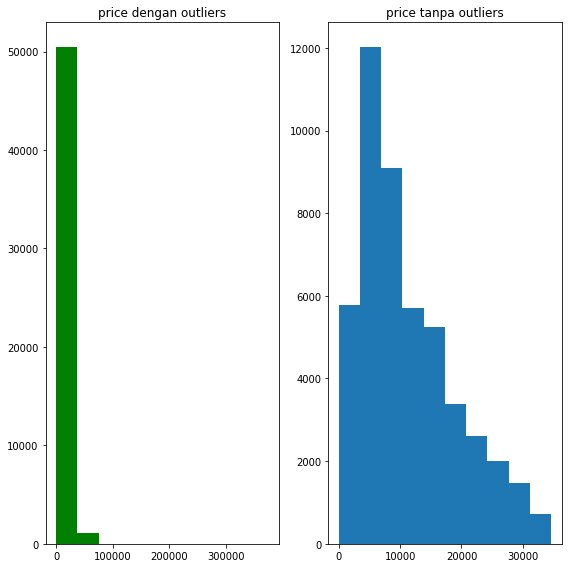

In [355]:
# price
fig, ax = plt.subplots(1,2)
ax[0].hist(vehicles['price'], color='green')
ax[1].hist(vehicles_new['price'])

ax[0].set_title("price dengan outliers")
ax[1].set_title("price tanpa outliers")

plt.tight_layout()
plt.show()

Dengan dihapusnya outlier, histogram menjadi lebih terdistribusi. Nilai `price` yang ekstrim telah terhapus.

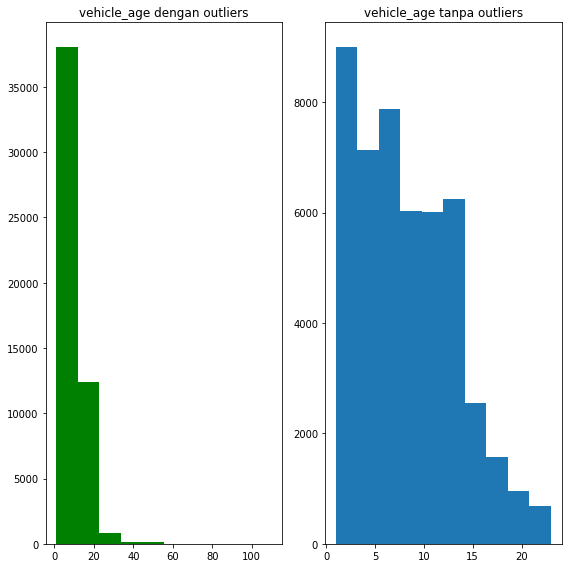

In [356]:
# vehicle_age
fig, ax = plt.subplots(1,2)
ax[0].hist(vehicles['vehicle_age'], color='green')
ax[1].hist(vehicles_new['vehicle_age'])

ax[0].set_title("vehicle_age dengan outliers")
ax[1].set_title("vehicle_age tanpa outliers")

plt.tight_layout()
plt.show()

`vehicle_age` tanpa outlier histogram menjadi lebih terdistribusi. Mobil antik (sangat tua) dihilangkan sehingga fokusnya adalah usia kendaraan yang lebih umum.

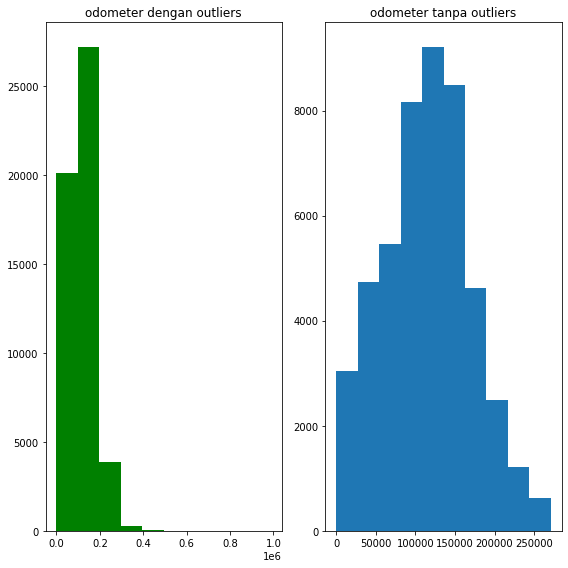

In [357]:
# odometer
fig, ax = plt.subplots(1,2)
ax[0].hist(vehicles['odometer'], color='green')
ax[1].hist(vehicles_new['odometer'])

ax[0].set_title("odometer dengan outliers")
ax[1].set_title("odometer tanpa outliers")

plt.tight_layout()
plt.show()

Dengan dihapusnya outliers histogram yang dihasilkan lebih terdistribusi. Nilai minus yang merusak analisa data telah dihilangkan, di mana tidak masuk akal jika terdapat `odometer` yang minus pada suatu kendaraan. 

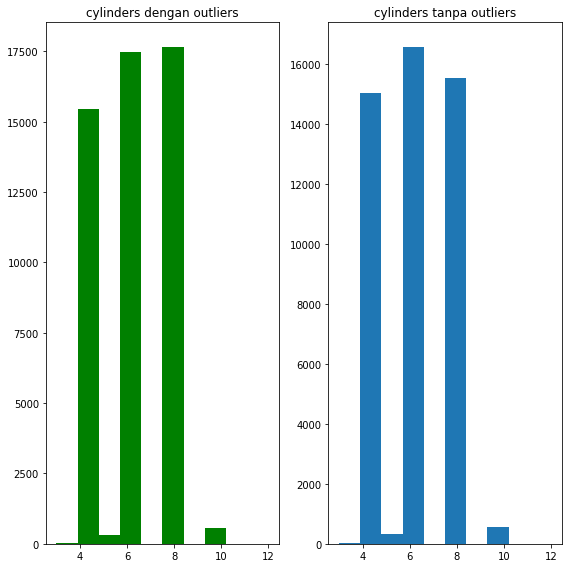

In [358]:
# cylinders
fig, ax = plt.subplots(1,2)
ax[0].hist(vehicles['cylinders'], color='green')
ax[1].hist(vehicles_new['cylinders'])

ax[0].set_title("cylinders dengan outliers")
ax[1].set_title("cylinders tanpa outliers")

plt.tight_layout()
plt.show()

Untuk kolom `cylinders` tidak terlalu banyak berubah karena kita tau nilai outliers yang ada hanya sedikit sekali, yaitu 2 dari analisa kita sebelumnya, sehingga bisa kita katakan = 0.

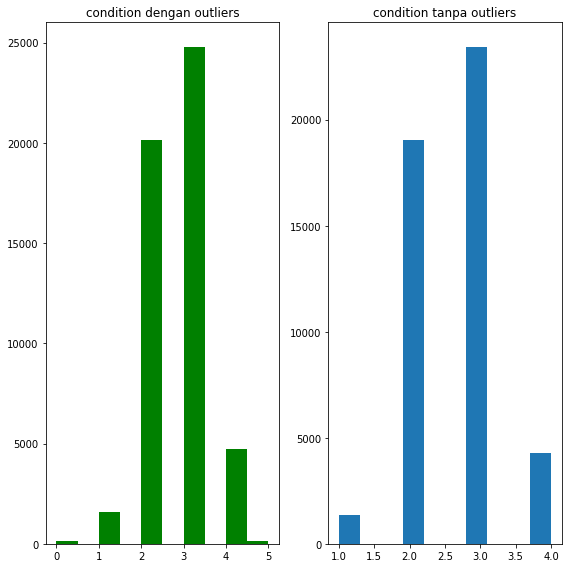

In [359]:
# condition
fig, ax = plt.subplots(1,2)
ax[0].hist(vehicles['condition'], color='green')
ax[1].hist(vehicles_new['condition'])

ax[0].set_title("condition dengan outliers")
ax[1].set_title("condition tanpa outliers")

plt.tight_layout()
plt.show()

Dalam kondisi tanpa outlier, `condition` salvage (nilai label 0) dihapus karena kondisi salvage tidak mewakili dengan baik harga mobil dari mobil yang aktif/pernah dipakai (kondisi kerja).

## Masa Berlaku Iklan 

In [360]:
vehicles.corr()['days_listed']

price          -0.000682
model_year     -0.005321
condition      -0.002404
cylinders       0.003789
odometer        0.002700
is_4wd          0.002003
days_listed     1.000000
day_posted      0.002734
month_posted   -0.011519
year_posted     0.011273
vehicle_age     0.005989
km_per_year    -0.005643
Name: days_listed, dtype: float64

Setelah menganalisis korelasi dengan parameter iklan lainnya, saya menyimpulkan bahwa durasi tampilan iklan tidak terkait dengan parameter mobil. Tidak ada korelasi dengan harga, meskipun awalnya saya berasumsi bahwa semakin rendah harga, semakin pendek waktu penayangan iklan.

In [361]:
# deskriptif statistik days_listed
round(vehicles_new['days_listed'].describe(), 0)

count    48051.0
mean        40.0
std         28.0
min          0.0
25%         19.0
50%         33.0
75%         53.0
max        271.0
Name: days_listed, dtype: float64

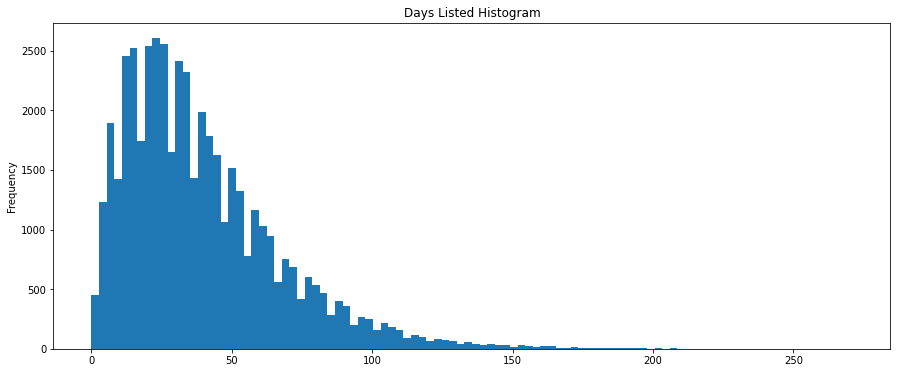

In [362]:
plt.figure(figsize=(15,6))
vehicles_new['days_listed'].plot(kind='hist', bins=100)
plt.title('Days Listed Histogram')
plt.show()

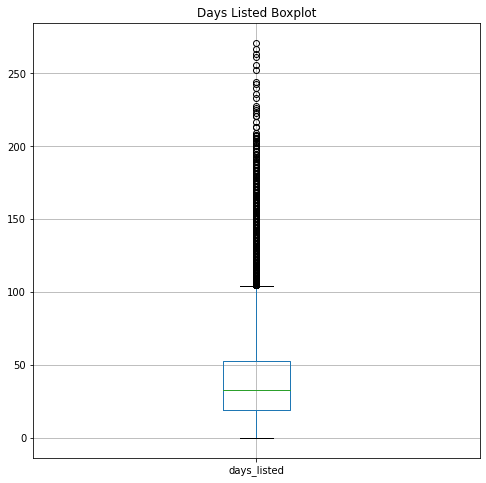

In [363]:
# mengecek outliers
vehicles_new.boxplot('days_listed')
plt.title('Days Listed Boxplot')
plt.show()

Langkah selanjutnya kita tentukan batas outlier dan buat histogram berdasarkan data tanpa outlier.

In [364]:
def outliers_lower_upper(column):
    q1 = vehicles_new[column].quantile(0.25)
    q3 = vehicles_new[column].quantile(0.75)
    iqr = q3 - q1
    if q1 - iqr*1.5 < 0:
        return (0, q3 + iqr*1.5)
    else:
        return (q1 - iqr*1.5, q3 + iqr*1.5)    

days_listed_outliers = outliers_lower_upper('days_listed')

print('Outliers limit "price" ', days_listed_outliers)

Outliers limit "price"  (0, 104.0)


In [365]:
len(vehicles_new.query('days_listed == 0'))

49

In [366]:
len(vehicles_new.query('days_listed > @days_listed_outliers[1]'))

1506

* 49 iklan ditampilkan selama 0 hari
* 1506 iklan ditampilkan selama lebih dari 104 hari

<AxesSubplot:title={'center':'Days Listed Histogram'}, ylabel='Frequency'>

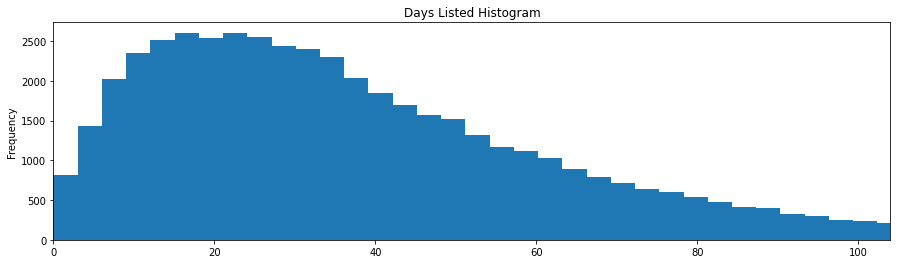

In [367]:
# histogram tanpa outliers
vehicles_new['days_listed'].plot(
    kind     = 'hist'
    ,title   = 'Days Listed Histogram'
    ,bins    = 90
    ,figsize = (15, 4)
    ,xlim=(0, 104)
)

* Histogram ini adalah tipe "Right-Skewed Distribution".  
* Kita dapat melihat bahwa sebagian besar iklan ditayangkan dalam 12-33 hari.

Selanjutnya kita membuat grafik HEXBIN untuk memperkirakan ketergantungan durasi publikasi pada `price`, `vehicle_age`, dan `odometer`.

<AxesSubplot:xlabel='days_listed', ylabel='vehicle_age'>

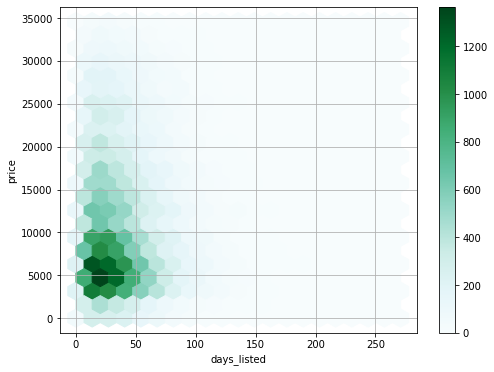

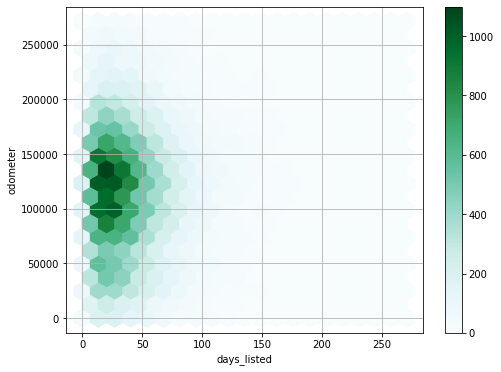

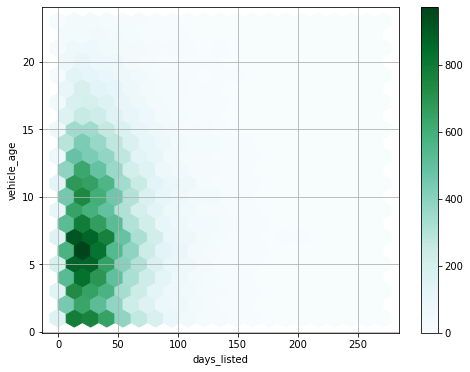

In [368]:
# days_listed hexbin terhadap pice, vehicle_age, dan odometer 
vehicles_new.plot(x='days_listed', y='price', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
vehicles_new.plot(x='days_listed', y='odometer', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)
vehicles_new.plot(x='days_listed', y='vehicle_age', kind='hexbin', gridsize=20, figsize=(8, 6), sharex=False, grid=True)

* Tidak ditemukan ketergantungan `days_listed` pada harga, usia, atau jarak tempuh.

Mari kita lihat apakah `days_listed` bergantung pada bulan terbitnya atau tidak.

<AxesSubplot:xlabel='month_posted'>

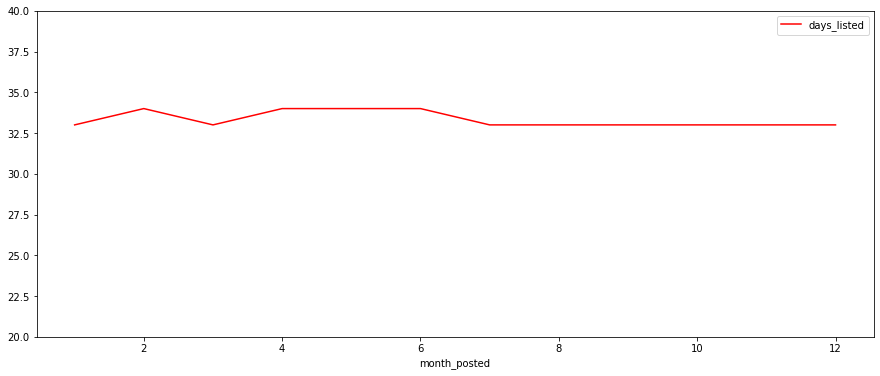

In [369]:
month_median = vehicles_new.pivot_table(index = 'month_posted', values = 'days_listed', aggfunc = 'median')
month_median.plot(figsize=(15, 6),color='red', ylim = (20,40), label='Month / Days listed')

* Berdasarkan grafik ketergantungan durasi publikasi pada bulan juga tidak ditemukan. Durasinya kurang lebih sama di setiap bulan.
* Namun, diketahui bahwa jumlah iklan sangat bergantung pada bulannya. Sebab lebih sedikit iklan di musim panas, lebih banyak di musim dingin.

In [370]:
month_count = vehicles_new.pivot_table(index = 'month_posted', values = 'days_listed', aggfunc = 'count')
month_count['name'] = month_count.index.values
month_dict = {10: 'October', 11: 'November', 12: 'December', 1: 'January',2:'February',3:'March',
              4:'April', 5: 'May',6:'June',7:'July',8:'August',9:'September'}

month_count['name'] = month_count['name'].replace(month_dict)
print(month_count)

fig = px.line_polar(month_count, r = 'days_listed',theta='name', line_close=True, 
                    title='Distribusi jumlah iklan berdasarkan bulan')
fig.update_traces(fill='toself')
fig.show()

              days_listed       name
month_posted                        
1                    4136    January
2                    3713   February
3                    4243      March
4                    2624      April
5                    4223        May
6                    3927       June
7                    4183       July
8                    4173     August
9                    4161  September
10                   4315    October
11                   4090   November
12                   4263   December


Mari kita analisis iklan yang ditempatkan kurang dari tiga hari.

In [371]:
vehicles_new['ad_short_time'] = vehicles_new['days_listed'] < 3

ad_short_time = (
    vehicles_new
    .pivot_table(index = ['model','vehicle_age','type']
    ,values = ['ad_short_time'])   
)
only_quick_ad = ad_short_time.query('ad_short_time > 0.5')
only_quick_ad

/tmp/ipykernel_27/1405574705.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,,,ad_short_time
model,vehicle_age,type,
chevrolet malibu,6,wagon,1.0
ford explorer,16,wagon,1.0
jeep wrangler unlimited,8,convertible,1.0
ram 1500,6,wagon,1.0
toyota rav4,3,hatchback,1.0
toyota tacoma,3,offroad,1.0


* Agak sulit menemukan konfirmasi bahwa mobil dengan merek dan usia tertentu sangat diminati, dan segera setelah dijual, pembeli segera ditemukan. Hanya ada 6 iklan seperti itu.
* Mungkinkah mobil-mobil yang laris manis ini memiliki harga jual yang terlalu rendah?

/tmp/ipykernel_27/3684684671.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



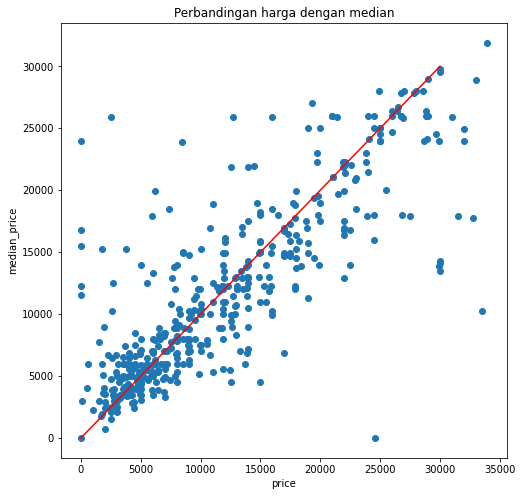

In [372]:
# buat tabel dengan iklan pendek yang ditampilkan
vehicles_new['median_price'] = (
    vehicles_new
    .groupby(['model','vehicle_age'])['price']
    .transform(fill_nan)
)

ad_short_price = vehicles_new.query('days_listed < 3')
ad_short_price

# create a spread with a center line
fig, ax = plt.subplots()
ax.scatter(ad_short_price['price'], ad_short_price['median_price'])

# plt(num=None, figsize=(8, 8))
plt.rcParams["figure.figsize"] = (8,8)
ax.plot([0, 30000], [0, 30000], c='r')    
plt.title("Perbandingan harga dengan median")
plt.xlabel("price")
plt.ylabel("median_price")
plt.show()

* Garis merah menandai garis keseimbangan untuk memudahkan analisis. Setelah membuat bagan "harga" / "harga median", kita dapat melihat bahwa iklan cepat memiliki harga di bawah median dan di atasnya.

Mari kita hitung berapa banyak iklan dengan harga di bawah median dan berapa di atas.

In [373]:
count_short_ad = len(ad_short_price) 
count_short_ad_price_low = len(ad_short_price.query('price < median_price')) 
count_short_ad_price_high = len(ad_short_price.query('price > median_price')) 
# 21 ads equal
print(count_short_ad_price_high)
print(count_short_ad_price_low)

226
193


* 226 iklan, harganya di atas rata-rata.
* 193 iklan, harganya di bawah rata-rata.

Mari kita analisis iklan yang telah diposting lebih dari 104 hari. Mungkin ada merek yang sangat sulit dicari pembelinya, atau harga di iklan tersebut di atas rata-rata?

Mari kita periksa hipotesis ini.

In [374]:
vehicles_new['ad_long_time'] = vehicles['days_listed'] > 104

ad_long_time = (
    vehicles_new
    .pivot_table(index = ['model','vehicle_age','type']
    ,values = ['ad_long_time'])   
)
only_long_ad = ad_long_time.query('ad_long_time > 0.5')
print(len(ad_long_time))
print(len(only_long_ad))

3389
31


/tmp/ipykernel_27/1936423989.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



* Terdapat 3389 iklan panjang
* 31 iklan ditampilkan untuk waktu yang lama

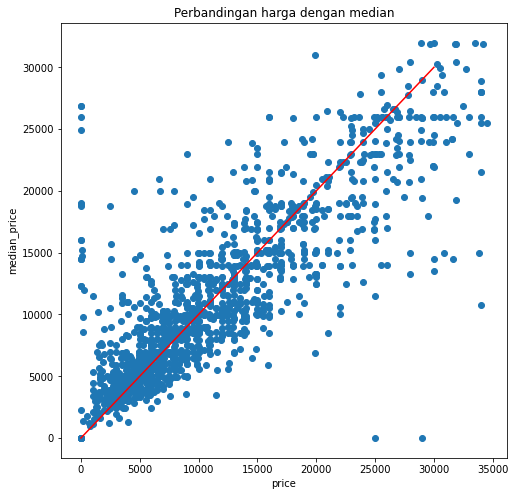

In [375]:
# mengecek harga jual
# membuat tabel dengan long displayed ad
ad_long_price = vehicles_new.query('days_listed > 104')
ad_long_price

# create a spread with a center line
fig, axL = plt.subplots()
axL.scatter(ad_long_price['price'], ad_long_price['median_price'])

# plt(num=None, figsize=(8, 8))
plt.rcParams["figure.figsize"] = (8,8)
axL.plot([0, 30000], [0, 30000], c='r')    
plt.title("Perbandingan harga dengan median")
plt.xlabel("price")
plt.ylabel("median_price")
plt.show()

Garis merah menandai garis keseimbangan untuk memudahkan analisis. Setelah membuat bagan "harga" / "harga median", kita dapat melihat bahwa iklan cepat memiliki harga di bawah median dan di atasnya.

Mari kita hitung berapa banyak iklan dengan harga di bawah median, dan berapa di atas

In [376]:
count_long_ad = len(ad_long_price) #
count_long_ad_price_low = len(ad_long_price.query('price < median_price')) 
count_long_ad_price_high = len(ad_long_price.query('price > median_price')) 

print(count_long_ad_price_high)
print(count_long_ad_price_low)

701
726


* 701 iklan, harganya di atas rata-rata.
* 726 iklan, harganya di bawah rata-rata.

Dapat disimpulkan bahwa harga tidak mempengaruhi lama iklan.

## Harga Rata-Rata Setiap Jenis Kendaraan

Kita akan melakukan analisis terhadap jumlah iklan dan harga rata-rata untuk setiap jenis kendaraan. Dengan membuat grafik yang menunjukkan ketergantungan jumlah iklan pada jenis kendaraan. 

In [377]:
# rata-rata harga dan jumlah iklan tiap tipe mobil diurutkan berdasarkan jumlah iklan
type_mean = vehicles_new.groupby(['type']).agg({
    'price' : 'mean',
    'model' : 'count'
}).rename(columns={
    'price' : 'avg_price',
    'model' : 'count_ads'
}).sort_values(by='count_ads', ascending=False)

type_mean

,avg_price,count_ads
type,,
sedan,6967.625505,11880
SUV,10451.445343,11865
truck,15150.837960,11059
pickup,15067.626314,6278
coupe,13544.286930,1997
wagon,9016.533019,1484
mini-van,8032.268357,1144
hatchback,6833.329305,993
van,8815.514630,581


In [378]:
# rata-rata harga dan jumlah iklan tiap tipe mobil diurutkan berdasarkan harga rata-rata
type_mean = vehicles_new.groupby(['type']).agg({
    'price' : 'mean',
    'model' : 'count'
}).rename(columns={
    'price' : 'avg_price',
    'model' : 'count_ads'
}).sort_values(by='avg_price', ascending=False)

type_mean

,avg_price,count_ads
type,,
bus,18107.428571,21
truck,15150.837960,11059
pickup,15067.626314,6278
offroad,14344.049451,182
coupe,13544.286930,1997
convertible,13084.289941,338
other,10602.698690,229
SUV,10451.445343,11865
wagon,9016.533019,1484


* Setelah menganalisis data jenis mobil, kita melihat bahwa sebagian besar iklan penjualan adalah sedan (11880) dan SUV (11865), dan jumlah iklan bus dan offroad paling sedikit. 
* Bus dan truk memiliki harga rata-rata tertinggi, sedangkan sedan dan hatchbac paling murah.

<AxesSubplot:title={'center':'days listed'}, xlabel='type'>

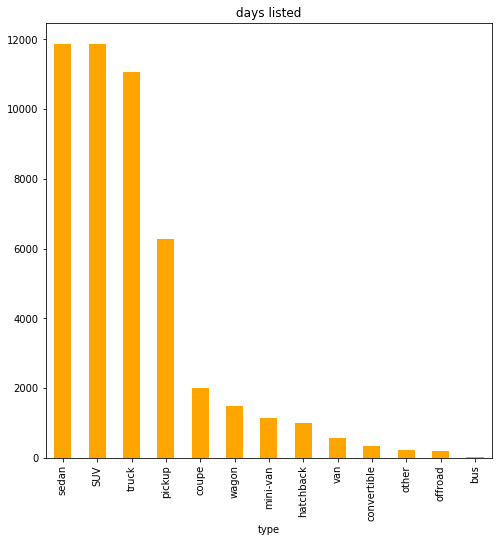

In [379]:
(
    type_mean['count_ads']
    .sort_values(ascending = False)
    .plot(kind= 'bar', title= 'days listed', color= 'orange')
)

Text(0.5, 0, 'Avegage Price and Ads Count per Model')

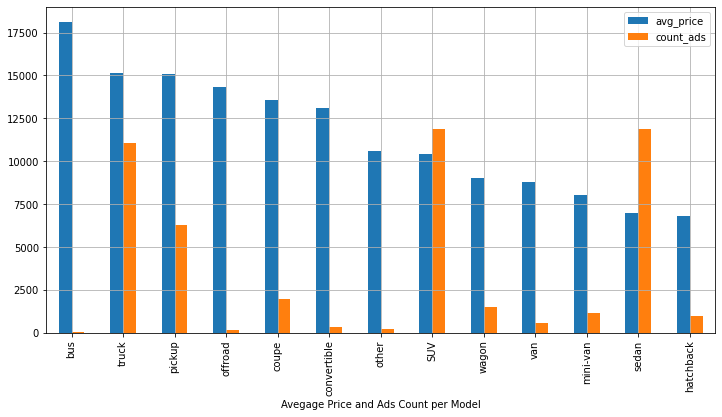

In [380]:
type_mean.plot(kind='bar', grid=True, figsize=(12, 6))
plt.xlabel('Avegage Price and Ads Count per Model')

* Jumlah iklan yang paling banyak adalah model sedan dan SUV. Hal ini dipengaruhi dari harga yang ditawarkan cenderung rendah. 
* Jenis mobil hatchback kurang diminati.

Mari kita ambil tipe sedan dan SUV untuk analisis lebih lanjut. Mari kita lihat korelasinya untuk memahami faktor apa yang paling memengaruhi harga.

## Faktor Harga

In [381]:
print(vehicles_new.corr()['price'])

price            1.000000
model_year       0.512937
condition        0.180977
cylinders        0.306476
odometer        -0.447263
is_4wd           0.332404
days_listed     -0.001058
day_posted       0.000524
month_posted    -0.009802
year_posted      0.008032
vehicle_age     -0.510615
km_per_year      0.233980
ad_short_time    0.008569
median_price     0.816112
ad_long_time    -0.003846
Name: price, dtype: float64


In [382]:
Image(url='https://res.cloudinary.com/dyd911kmh/image/upload/v1645797214/image3_yzl0dq.png')

### **Mobil Sedan**

In [383]:
# membuat dataset baru sedan
sedan_vehicle = vehicles_new.loc[vehicles_new['type'] == 'sedan'].reset_index(drop=True)
sedan_vehicle.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,date_posted,days_listed,day_posted,month_posted,year_posted,vehicle_age,km_per_year,ad_short_time,median_price,ad_long_time
0,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,...,2019-02-07,79,3,2,2019,6,18333.0,False,6000.0,False
1,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,...,2019-04-02,28,1,4,2019,2,40452.0,False,9474.5,False
2,14990,2014,chrysler 300,3,6,gas,57954,automatic,sedan,black,...,2018-06-20,15,2,6,2018,4,14488.0,False,12995.0,False
3,12990,2015,toyota camry,3,4,gas,79212,automatic,sedan,white,...,2018-12-27,73,3,12,2018,3,26404.0,False,13250.0,False
4,8990,2012,honda accord,3,4,gas,111142,automatic,sedan,grey,...,2019-03-28,29,3,3,2019,7,15877.0,False,6999.0,False


In [384]:
# mengecek korelasi
round(sedan_vehicle.corr()['price'], 2)

price            1.00
model_year       0.62
condition        0.29
cylinders       -0.05
odometer        -0.57
is_4wd           0.04
days_listed      0.00
day_posted      -0.00
month_posted    -0.02
year_posted      0.02
vehicle_age     -0.61
km_per_year      0.27
ad_short_time    0.01
median_price     0.71
ad_long_time     0.01
Name: price, dtype: float64

`vehicle_age` dan `odometer` masih menjadi faktor utama yang paling memengaruhi harga, dan pengaruhnya menjadi lebih besar daripada rata-rata untuk semua iklan.

In [385]:
# mengecek nilai transmisi
sedan_vehicle['transmission'].value_counts()

automatic    11180
manual         573
other          127
Name: transmission, dtype: int64

In [386]:
# mengecek jumlah warna
sedan_vehicle['paint_color'].value_counts()

other     2139
silver    2016
black     1738
grey      1597
white     1469
blue      1204
red        920
custom     288
brown      253
green      202
purple      24
yellow      21
orange       9
Name: paint_color, dtype: int64

***vehicle_age***

<AxesSubplot:title={'center':'Age VS Price'}, xlabel='vehicle_age', ylabel='price'>

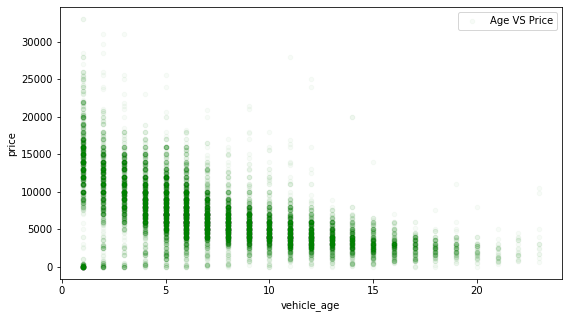

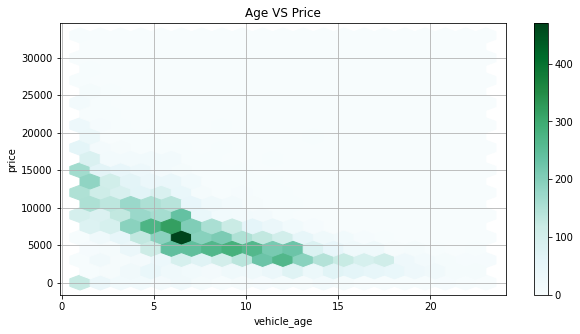

In [398]:
sedan_vehicle.plot(x = 'vehicle_age', y = 'price', kind='scatter',
                figsize=(9, 5),color='Green', label='Age VS Price', alpha = 0.03)
sedan_vehicle.plot(x = 'vehicle_age', y = 'price', kind='hexbin', gridsize=20, 
                figsize=(10, 5), sharex=False, grid=True, title='Age VS Price')

Semakin tua mobilnya (besar umurnya), semakin turun harganya. Sehingga korelasinya adalah hubungan negatif.

***odometer***

<AxesSubplot:title={'center':'Odometer VS Price'}, xlabel='odometer', ylabel='price'>

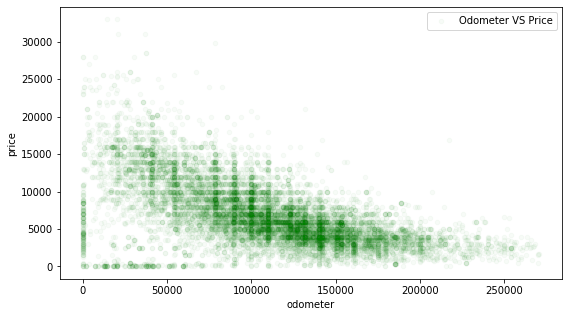

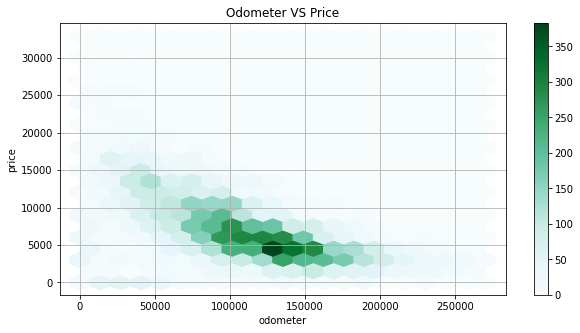

In [397]:
sedan_vehicle.plot(x = 'odometer', y = 'price', kind='scatter',
                   figsize=(9, 5),color='Green', label='Odometer VS Price', alpha = 0.03)
sedan_vehicle.plot(x = 'odometer', y = 'price', kind='hexbin', gridsize=20, 
                figsize=(10, 5), sharex=False, grid=True, title='Odometer VS Price')

Semakin banyak (panjang) jarak tempuh, semakin rendah harga mobil. Hubungan keterbalikan.

***condition***

<AxesSubplot:title={'center':'Condition VS Price'}, xlabel='condition', ylabel='price'>

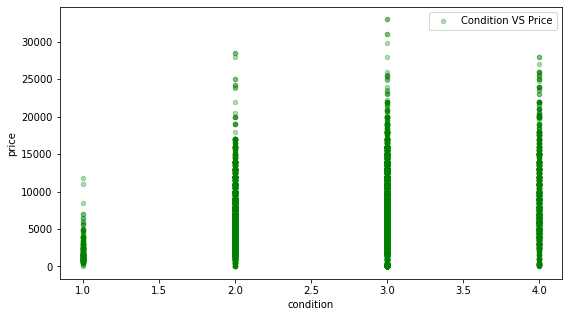

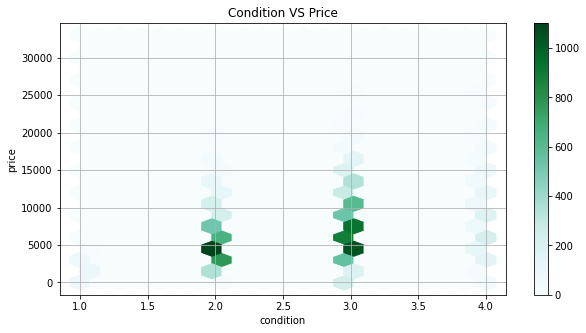

In [400]:
sedan_vehicle.plot(x = 'condition', y = 'price', kind='scatter',
                figsize=(9, 5),color='Green', label='Condition VS Price', alpha = 0.3)
sedan_vehicle.plot(x = 'condition', y = 'price', kind='hexbin', gridsize=20, 
                figsize=(10, 5), sharex=False, grid=True, title='Condition VS Price')


Seperti yang dapat kita lihat dari grafik, `condition` memengaruhi harga, tetapi tidak sebanyak usia dan jarak tempuh. Semakin bagus kondisinya, maka semakin tinggi harganya.

***transmission***

<AxesSubplot:title={'center':'Transmission VS Price'}, xlabel='transmission', ylabel='price'>

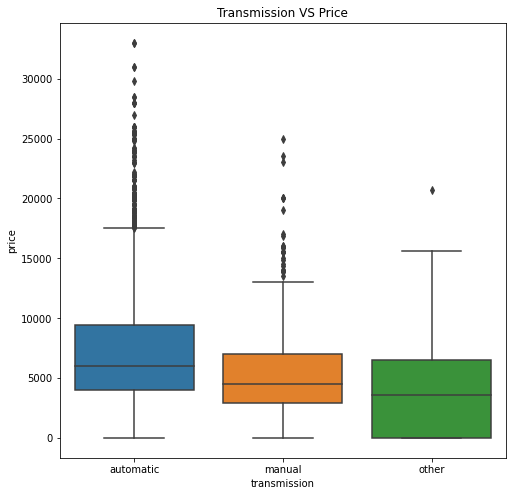

In [405]:
plt.title('Transmission VS Price')
sns.boxplot(data=sedan_vehicle, x='transmission', y='price')

Sedan dengan transmisi otomatis lebih mahal dan memiliki kisaran harga yang lebih besar.

***paint_color***

<AxesSubplot:xlabel='paint_color', ylabel='price'>

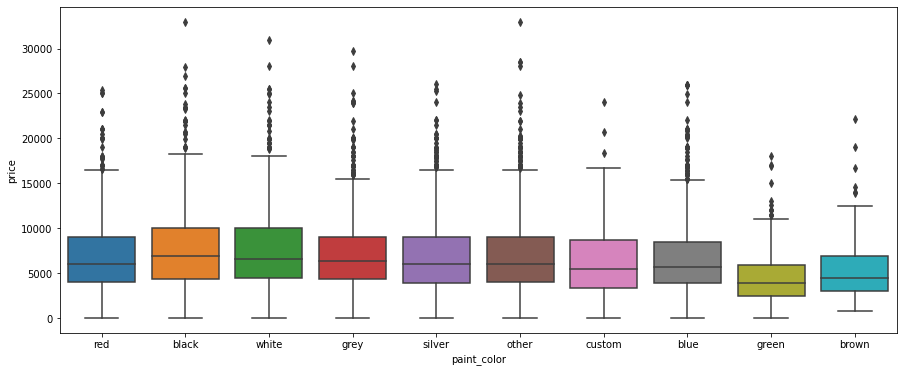

In [407]:
list_of_color = list(
    sedan_vehicle
    .groupby(['paint_color'])['vehicle_age']
    .count()
    .reset_index()
    .query('vehicle_age > 50')['paint_color']
    .unique())

plt.figure(figsize = (15,6))
sns.boxplot(
    x = "paint_color"
    , y = "price"
    , data = sedan_vehicle.query('paint_color in @list_of_color')
)

* Jumlah warna purple, yellow, dan orange < 50, maka warna tersebut tidak kita pakai untuk analisa.
* Kita bisa melihat sedan hijau paling murah, dan putih hitam paling mahal.

### **Mobil SUV**

In [408]:
# membuat dataset baru SUV
suv_vehicle = vehicles_new.loc[vehicles_new['type'] == 'SUV'].reset_index(drop=True)
suv_vehicle.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,date_posted,days_listed,day_posted,month_posted,year_posted,vehicle_age,km_per_year,ad_short_time,median_price,ad_long_time
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,other,...,2018-06-23,19,5,6,2018,7,20714.0,False,12850.0,False
1,15990,2013,honda pilot,3,6,gas,109473,automatic,SUV,black,...,2019-01-07,68,0,1,2019,6,18246.0,False,12995.0,False
2,11500,2012,kia sorento,3,4,gas,104174,automatic,SUV,other,...,2018-07-16,19,0,7,2018,6,17362.0,False,8450.0,False
3,9200,2008,honda pilot,3,6,gas,147191,automatic,SUV,blue,...,2019-02-15,17,4,2,2019,11,13381.0,False,7000.0,False
4,12990,2009,gmc yukon,3,8,gas,132285,automatic,SUV,black,...,2019-01-31,24,3,1,2019,10,13228.0,False,9900.0,False


In [409]:
# mengecek korelasi
round(suv_vehicle.corr()['price'], 2)

price            1.00
model_year       0.58
condition        0.26
cylinders       -0.00
odometer        -0.53
is_4wd           0.11
days_listed     -0.02
day_posted       0.01
month_posted    -0.01
year_posted      0.00
vehicle_age     -0.58
km_per_year      0.26
ad_short_time    0.01
median_price     0.78
ad_long_time    -0.01
Name: price, dtype: float64

`vehicle_age` dan `odometer` masih menjadi faktor utama yang paling memengaruhi harga, dan pengaruhnya menjadi lebih besar daripada rata-rata untuk semua iklan.

In [410]:
# mengecek nilai transmisi
suv_vehicle['transmission'].value_counts()

automatic    11247
manual         460
other          158
Name: transmission, dtype: int64

In [411]:
# mengecek jumlah warna
suv_vehicle['paint_color'].value_counts()

other     2134
black     2089
white     1865
silver    1530
grey      1145
blue      1009
red        869
green      415
brown      352
custom     294
orange      81
yellow      43
purple      39
Name: paint_color, dtype: int64

***vehicle_age***

<AxesSubplot:title={'center':'Age VS Price'}, xlabel='vehicle_age', ylabel='price'>

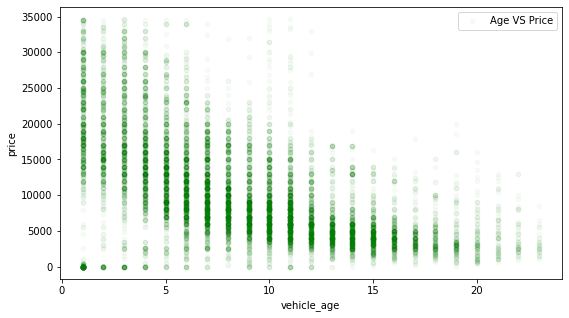

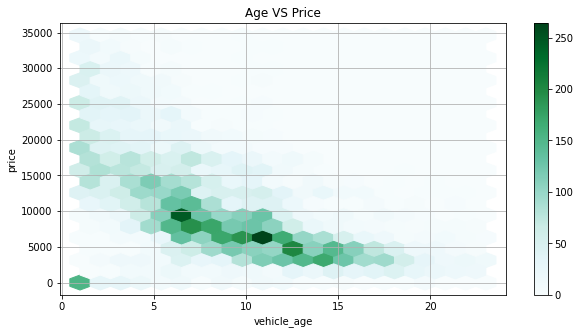

In [412]:
suv_vehicle.plot(x = 'vehicle_age', y = 'price', kind='scatter',
                figsize=(9, 5),color='Green', label='Age VS Price', alpha = 0.03)
suv_vehicle.plot(x = 'vehicle_age', y = 'price', kind='hexbin', gridsize=20, 
                figsize=(10, 5), sharex=False, grid=True, title='Age VS Price')

Semakin tua mobilnya (besar umurnya), semakin turun harganya. Sehingga korelasinya adalah hubungan negatif.

***odometer***

<AxesSubplot:title={'center':'Odometer VS Price'}, xlabel='odometer', ylabel='price'>

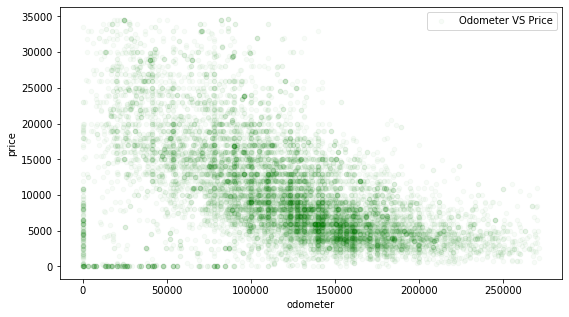

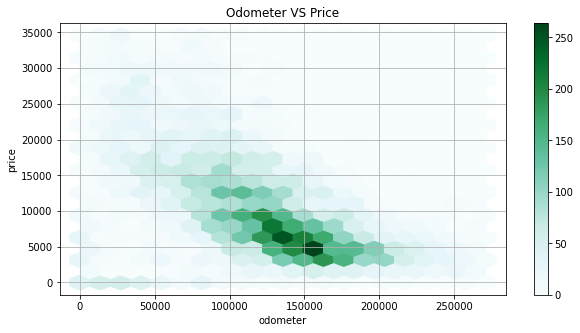

In [413]:
suv_vehicle.plot(x = 'odometer', y = 'price', kind='scatter',
                   figsize=(9, 5),color='Green', label='Odometer VS Price', alpha = 0.03)
suv_vehicle.plot(x = 'odometer', y = 'price', kind='hexbin', gridsize=20, 
                figsize=(10, 5), sharex=False, grid=True, title='Odometer VS Price')

Semakin banyak (panjang) jarak tempuh, semakin rendah harga mobil. Hubungan keterbalikan.

***condition***

<AxesSubplot:title={'center':'Condition VS Price'}, xlabel='condition', ylabel='price'>

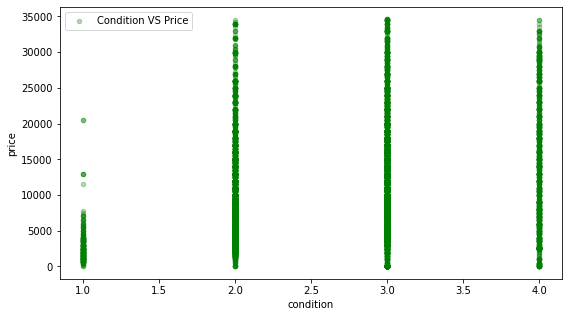

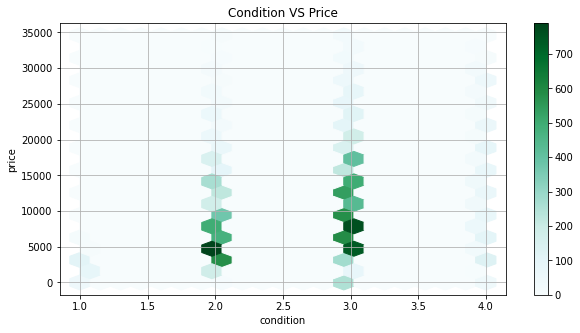

In [414]:
suv_vehicle.plot(x = 'condition', y = 'price', kind='scatter',
                figsize=(9, 5),color='Green', label='Condition VS Price', alpha = 0.3)
suv_vehicle.plot(x = 'condition', y = 'price', kind='hexbin', gridsize=20, 
                figsize=(10, 5), sharex=False, grid=True, title='Condition VS Price')


Seperti yang dapat kita lihat dari grafik, `condition` memengaruhi harga, tetapi tidak sebanyak usia dan jarak tempuh. Semakin bagus kondisinya, maka semakin tinggi harganya.

***transmission***

<AxesSubplot:title={'center':'Transmission VS Price'}, xlabel='transmission', ylabel='price'>

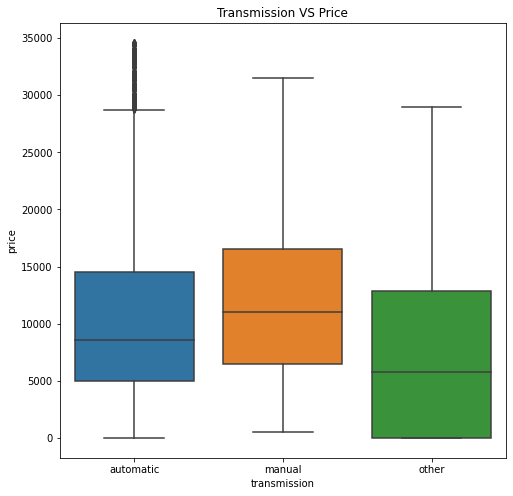

In [415]:
plt.title('Transmission VS Price')
sns.boxplot(data=suv_vehicle, x='transmission', y='price')

SUV dengan transmisi manual lebih mahal dan memiliki kisaran harga yang lebih besar.

***paint_color***

<AxesSubplot:xlabel='paint_color', ylabel='price'>

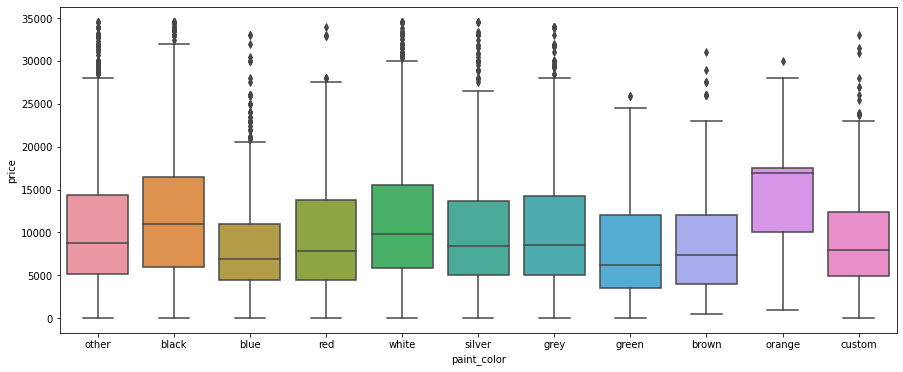

In [416]:
list_of_color = list(
    suv_vehicle
    .groupby(['paint_color'])['vehicle_age']
    .count()
    .reset_index()
    .query('vehicle_age > 50')['paint_color']
    .unique())

plt.figure(figsize = (15,6))
sns.boxplot(
    x = "paint_color"
    , y = "price"
    , data = suv_vehicle.query('paint_color in @list_of_color')
)

* Jumlah warna purple, dan yellow < 50, maka warna tersebut tidak kita pakai untuk analisa.
* Kita bisa melihat SUV oranye adalah yang paling mahal, sedangkan biru, hijau, dan coklat adalah yang termurah.

## Kesimpulan Umum

Masalah:
- Nilai yang hilang untuk diisi dalam lima kolom: model_year, cylinders, odometer, paint_color, dan is_4wd.
- Tidak terdapat nilai duplikat.
- is_4wd adalah boolean jadi kita hanya perlu mengisi nilai yang hilang dengan 0 = False.
- Nilai hilang pada paint_color diisi dengan value 'other'.
- Kolom model_year dan odometer diisi dengan median.
- Di kolom cylinders kita meengganti nama yang mirip dan mengisi nilai yang hilang dengan median.
- Memperbaiki tipe data model_year, cylinders, odometer, is_4wd, dan date_posted.
- Memperbaiki kualitas data dengan membagi turunan dari kolom date_posted, kemudian juga merubah nilai kolom condition ke numerik untuk bantuan analisa.
- Terdapat beberapa outlier yang harus ditangani pada dataset awal, sehingga perlu membuat dataset baru untuk perbandingan. Kemungkinan kesalahan outlier pada proses analisa, penarikan, atau input data (pipeline), maupun terjadi secara natural pada data dengan variasi yang banyak.

Analisa:
- Memeriksa data yang sudah bersih.
- Mempelajari parameter inti yang akan mempengaruhi hasil analisa.
- Mempelajari dan menangani outlier dengan mencari tau batas atas dan batas bawah serta IQR untuk menyelesaikan masalah data yang anomali ataupun ekstrim.
- Melakukan perbandingan data dengan memanfaatkan grafik visualisasi antara data yang ada outlier dan tanpa outlier.
- Menganalisa masa berlaku iklan.
- Mencari rata-rata harga dari setiap jenis kendaraan.
- Mencari tau korelasi atau pengaruh harga terhadap kendaraan dengan jumlah iklan terbanyak.

Hasil:
- Masa berlaku iklan yang disarankan 20-100 hari.
- Harga dipengaruhi oleh umur mobil, jarak tempuh, dan jumlah iklan dipengaruhi oleh musim; di musim dingin, ada lebih banyak iklan, dan di musim panas, jumlahnya lebih sedikit.
- Sebagian besar iklan penjualan adalah sedan (11880) dan SUV (11865), hal ini dipengaruhi dari harga yang ditawarkan cenderung rendah. dan jumlah iklan bus dan offroad paling sedikit. Bus dan truk memiliki harga rata-rata tertinggi, sedangkan sedan dan hatchbac paling murah. 
- Semakin tua mobilnya (besar umurnya), semakin turun harganya.
- Semakin banyak (panjang) jarak tempuh, semakin rendah harga mobil.
- Semakin bagus kondisinya, maka semakin tinggi harga mobil.
- Sedan dengan transmisi otomatis lebih mahal dan memiliki kisaran harga yang lebih besar.
- SUV dengan transmisi manual lebih mahal dan memiliki kisaran harga yang lebih besar.
- Terdapat preferensi warna yang berbeda di tiap jenis mobil, kemungkinan besar tergantung selera pembeli.